# Telecom Churn Case Study

Conducted by:
- Himanshu Yadav

## Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.


## Business Objective
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

## Approach

### 1. Data Understanding and Preparation
- Filtering High value customer
- Feature Dropping having no variance
- Deriving new features
- Tag churners and remove attributes of the churn phase
- Handling Missing values
- Handling Outliers
- Correlation check
- Univariate, Bivariate and multivariate analysis
- Splitting data into training and testing set
- Feature Scaling
- Treating imbalance in data

### 2. Building Predictor Model
- PCA
- Build Logistic Regression Model
- Build Decision Tree Model
- Build Random Forest Classifier model
- Build XGBoost classifier model
- compare models with metrics and finalize the model

### 3. Building Interpretable model
- Getting top features using RFE
- Optimize the model by VIF and p-values
- Build model with final set of features
- Depicting the features effect on churn

### 4. Recommendation for Business

### 5. Conclusions


# 1. Data Understanding and Preparation

Importing some important libraries and suppressing some warnings

In [3]:
# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [4]:
# importing data from csv file
telecom_df = pd.read_csv("telecom_churn_data.csv")

In [5]:
# checking the size of the dataset/data
telecom_df.shape

(99999, 226)

In [6]:
# Having a look at the first few rows of data / and some random sample
telecom_df.head(5)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

### Insights
- mobile number is unique for each customer and hence can be used as an identifiers

In [7]:
# setting mobile number as index
telecom_df = telecom_df.set_index('mobile_number')

In [8]:
telecom_df.sample(5)

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
mobile_number                                                              
7000262853           109             0.0             0.0             0.0   
7002009552           109             0.0             0.0             0.0   
7000002741           109             0.0             0.0             0.0   
7001232988           109             0.0             0.0             0.0   
7000461757           109             0.0             0.0             0.0   

              last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
mobile_number                                                                  
7000262853               6/30/2014            7/31/2014            8/31/2014   
7002009552               6/30/2014            7/31/2014            8/31/2014   
7000002741               6/30/2014            7/31/2014            8/31/2014   
7001232988               6/30/2014            7/31/2014            8/31/2014   
7000461757               6/30/2014            7/31/2014            8/31/2014   

              last_date_of_month_9    arpu_6   arpu_7  ...  sachet_3g_9  \
mobile_number                                          ...                
7000262853               9/30/2014   455.341  463.719  ...            0   
7002009552               9/30/2014   629.823  402.085  ...            0   
7000002741               9/30/2014   261.126  233.869  ...            0   
7001232988               9/30/2014  1222.000  448.928  ...            0   
7000461757               9/30/2014   539.827  630.532  ...            0   

               fb_user_6  fb_user_7  fb_user_8  fb_user_9  aon  aug_vbc_3g  \
mobile_number                                                                
7000262853           1.0        1.0        1.0        1.0  674       11.82   
7002009552           NaN        NaN        NaN        NaN  530        0.00   
7000002741           NaN        NaN        NaN        1.0  230        0.00   
7001232988           1.0        1.0        1.0        1.0  350     2897.56   
7000461757           NaN        1.0        1.0        1.0  666        0.00   

               jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
mobile_number                                      
7000262853           0.00        0.00        2.48  
7002009552           0.00        0.00        0.00  
7000002741           0.00        0.00        0.00  
7001232988         360.25     1718.82      443.73  
7000461757           0.00        0.00        0.00  

[5 rows x 225 columns]

In [9]:
# Checking the datatype of the columns
print("******Numerical Features******")
for col in telecom_df.select_dtypes(include=['int64','float64']).columns:
    print(col)

******Numerical Features******
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
arpu_6
arpu_7
arpu_8
arpu_9
onnet_mou_6
onnet_mou_7
onnet_mou_8
onnet_mou_9
offnet_mou_6
offnet_mou_7
offnet_mou_8
offnet_mou_9
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_ic_mou_9
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
roam_og_mou_9
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2t_mou_9
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2m_mou_9
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2f_mou_9
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_t2c_mou_9
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
loc_og_mou_9
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2t_mou_9
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2m_mou_9
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2f_mou_9
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_og_mou_6
std_og_mou_7
std_og_mou_8
std_og_mou_9
isd_og_mou_6
isd_og_mou_7


In [10]:
print("**** Other features******")
for col in telecom_df.select_dtypes(include=['object']).columns :
    print(col)

**** Other features******
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_9
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
date_of_last_rech_data_9


In [11]:
# checking null values
print((telecom_df.isnull().sum()/len(telecom_df)*100).to_string())

circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_

In [12]:
# checking numerical colums 
telecom_df.describe()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
count    99999.0         98981.0         98981.0         98981.0   
mean       109.0             0.0             0.0             0.0   
std          0.0             0.0             0.0             0.0   
min        109.0             0.0             0.0             0.0   
25%        109.0             0.0             0.0             0.0   
50%        109.0             0.0             0.0             0.0   
75%        109.0             0.0             0.0             0.0   
max        109.0             0.0             0.0             0.0   

             arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000  96062.000000   
mean     282.987358    278.536648    279.154731    261.645069    132.395875   
std      328.439770    338.156291    344.474791    341.998630    297.207406   
min    -2258.709000  -2014.045000   -945.808000  -1899.505000      0.000000   
25%       93.411500     86.980500     84.126000     62.685000      7.380000   
50%      197.704000    191.640000    192.080000    176.849000     34.310000   
75%      371.060000    365.344500    369.370500    353.466500    118.740000   
max    27731.088000  35145.834000  33543.624000  38805.617000   7376.710000   

        onnet_mou_7  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  96140.000000  ...  99999.000000  25153.000000  25571.000000   
mean     133.670805  ...      0.084581      0.914404      0.908764   
std      308.794148  ...      0.650457      0.279772      0.287950   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        6.660000  ...      0.000000      1.000000      1.000000   
50%       32.330000  ...      0.000000      1.000000      1.000000   
75%      115.595000  ...      0.000000      1.000000      1.000000   
max     8157.780000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 213 columns]

## Filtering High Value Customer

**High Value Customer** : Customers with high values are those who have recharged an amount equal to or greater than the 70th percentile of the average recharge amount in the first two months (the good phase).

Within this project, our objective is to establish the definition of high-value customers and only focus on predicting churn among these high-value customers.

In the given data set the first two months are 6 and 7 (i.e the attributes ending with _6 and _7). Which is the good phase of the customer.

Inspecting the recharge amount in the good phase of customer (i.e., month 6 and 7)

In [13]:
#checking missing values in 'av_rech_amt_data_6' and av_rech_amt_data_7

print("Missing value in 'av_rech_amt_data_6': ", telecom_df.av_rech_amt_data_6.isnull().sum()/len(telecom_df))
print("Missing value in 'av_rech_amt_data_7': ", telecom_df.av_rech_amt_data_7.isnull().sum()/len(telecom_df))

Missing value in 'av_rech_amt_data_6':  0.7484674846748467
Missing value in 'av_rech_amt_data_7':  0.7442874428744287


In [14]:
telecom_df[['av_rech_amt_data_6',"av_rech_amt_data_7"]].describe()

av_rech_amt_data_6  av_rech_amt_data_7
count        25153.000000        25571.000000
mean           192.600982          200.981292
std            192.646318          196.791224
min              1.000000            0.500000
25%             82.000000           92.000000
50%            154.000000          154.000000
75%            252.000000          252.000000
max           7546.000000         4365.000000

After analysing the statistical summary, in case customer did not make a recharge, recharge data is missing. Hence we can impute the missing value with 0

In [15]:
telecom_df.av_rech_amt_data_6 = telecom_df.av_rech_amt_data_6.fillna(0)
telecom_df.av_rech_amt_data_7 = telecom_df.av_rech_amt_data_7.fillna(0)

# aggregating 6 and 7 months column to extract high value customer
telecom_df["av_rech_amt_data_6_7"] = telecom_df.av_rech_amt_data_6 + telecom_df.av_rech_amt_data_7

print("High value customers : ", telecom_df[telecom_df.av_rech_amt_data_6_7 >= telecom_df.av_rech_amt_data_6_7.quantile(0.70)].shape)

high_valued_customers_df =  telecom_df[telecom_df.av_rech_amt_data_6_7 >= telecom_df.av_rech_amt_data_6_7.quantile(0.70)]
high_valued_customers_df.drop('av_rech_amt_data_6_7', axis=1, inplace=True)
print(high_valued_customers_df.shape)

High value customers :  (30378, 226)
(30378, 225)


## Feature Dropping having no variance

In [16]:
# features whose values is constant and same for all the rows is useless for prediction
constant_value_cols = []
for i in high_valued_customers_df.columns:
    if len(high_valued_customers_df[i].value_counts()) == 1 : 
        constant_value_cols.append(i)
        print(high_valued_customers_df[i].value_counts())
print("\n\n")
print(constant_value_cols)

109    30378
Name: circle_id, dtype: int64
0.0    29965
Name: loc_og_t2o_mou, dtype: int64
0.0    29965
Name: std_og_t2o_mou, dtype: int64
0.0    29965
Name: loc_ic_t2o_mou, dtype: int64
6/30/2014    30378
Name: last_date_of_month_6, dtype: int64
7/31/2014    30319
Name: last_date_of_month_7, dtype: int64
8/31/2014    30143
Name: last_date_of_month_8, dtype: int64
9/30/2014    29940
Name: last_date_of_month_9, dtype: int64
0.0    29312
Name: std_og_t2c_mou_6, dtype: int64
0.0    29293
Name: std_og_t2c_mou_7, dtype: int64
0.0    28587
Name: std_og_t2c_mou_8, dtype: int64
0.0    27886
Name: std_og_t2c_mou_9, dtype: int64
0.0    29312
Name: std_ic_t2o_mou_6, dtype: int64
0.0    29293
Name: std_ic_t2o_mou_7, dtype: int64
0.0    28587
Name: std_ic_t2o_mou_8, dtype: int64
0.0    27886
Name: std_ic_t2o_mou_9, dtype: int64



['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_o

Removing the following features from high values customer (having no variance or constant): ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']

In [17]:
high_valued_customers_df.drop(constant_value_cols,axis=1,inplace=True)

In [18]:
high_valued_customers_df.shape

(30378, 209)

## Deriving New Features

Before moving further lets segregate the recharge related variables/features into a separate dataframe. For good phase and action phase that is 6,7 (good phase) 8 (action phase)

In [19]:
high_value_recharge_df = high_valued_customers_df[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',]]

In [20]:
# finding the total number of missing values 
for col in high_value_recharge_df.columns:
    print (col, high_value_recharge_df[col].isnull().sum())

date_of_last_rech_6 171
date_of_last_rech_7 217
date_of_last_rech_8 758
date_of_last_rech_data_6 6147
date_of_last_rech_data_7 5689
date_of_last_rech_data_8 9877


In [21]:
high_value_recharge_df.head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
mobile_number                                                               
7000842753              6/21/2014           7/16/2014            8/8/2014   
7001865778              6/29/2014           7/31/2014           8/28/2014   
7000142493              6/26/2014           7/28/2014            8/9/2014   
7001524846              6/25/2014           7/31/2014           8/30/2014   
7001864400              6/29/2014           7/23/2014           8/29/2014   

              date_of_last_rech_data_6 date_of_last_rech_data_7  \
mobile_number                                                     
7000842753                   6/21/2014                7/16/2014   
7001865778                         NaN                7/25/2014   
7000142493                    6/4/2014                      NaN   
7001524846                         NaN                7/31/2014   
7001864400                         NaN                7/23/2014   

              date_of_last_rech_data_8  
mobile_number                           
7000842753                    8/8/2014  
7001865778                   8/10/2014  
7000142493                         NaN  
7001524846                   8/23/2014  
7001864400                         NaN

From here we are going to derive two new feature "date_of_last_rech" and "date_last_rech_data". Basically we are going to take the most recent recharge date out of 6th, 7th and 8th month and consider it as the last recharge date. 

**Pseudo code**
We are going to perform following step for each customer or row in high value customer dataframe
- if for a particular customer there is value in 8th month -> take that as last recharge date
- else if there is value in 7th month -> take that as last recharge date
- else take the value of 6th month as the last recharge date


create derived columns and initialise them with 8th month column

In [22]:
high_value_recharge_df['date_of_last_rech_data'] = high_value_recharge_df['date_of_last_rech_data_8']
high_value_recharge_df['date_of_last_rech'] = high_value_recharge_df['date_of_last_rech_8']

In [23]:
high_value_recharge_df.columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data',
       'date_of_last_rech'],
      dtype='object')

In [24]:
for customer in range(high_value_recharge_df.shape[0]):
    #if last recharge done is not in 8th month then check of 7 and else 6th month date is the last recharge date
    if pd.isnull(high_value_recharge_df.iloc[customer,2]):
        if pd.isnull(high_value_recharge_df.iloc[customer,1]):
            high_value_recharge_df.iloc[customer,7] = high_value_recharge_df.iloc[customer,0]
        else:
            high_value_recharge_df.iloc[customer,7] = high_value_recharge_df.iloc[customer,1]
    
    # if last date recharge is not in 8th month then check of 7th month else 6th month is the last data recharge date
    if pd.isnull(high_value_recharge_df.iloc[customer,5]):
        if pd.isnull(high_value_recharge_df.iloc[customer,4]):
            high_value_recharge_df.iloc[customer,6] = high_value_recharge_df.iloc[customer,3]
        else:
            high_value_recharge_df.iloc[customer,6] = high_value_recharge_df.iloc[customer,4]

Lets check for null values in derived columns

In [25]:
high_value_recharge_df[['date_of_last_rech_data','date_of_last_rech']].isnull().sum()

date_of_last_rech_data    0
date_of_last_rech         0
dtype: int64

Now we have to derived columns with no null values.
Since we cannot work directly with date object or in date notation. We will convert the date into number of days since last recharge. As 8th month is the action phase we are going to take 1st of 9th month as reference date to calculate the number of days since last recharge.
Assuming we got the data on 1st of 9th month

In [26]:
#import datetime library
import datetime

In [27]:
#convert datatype of 'date_of_last_rech_data','date_of_last_rech' to datetime object
high_value_recharge_df['date_of_last_rech_data'] = high_value_recharge_df['date_of_last_rech_data'].astype('datetime64[ns]')
high_value_recharge_df['date_of_last_rech'] = high_value_recharge_df['date_of_last_rech'].astype('datetime64[ns]')

high_value_recharge_df['ref_date'] = datetime.date(2014,9,1)
high_value_recharge_df['ref_date'] = pd.to_datetime(high_value_recharge_df['ref_date'])

#now for data recharge
high_value_recharge_df['days_passed_since_last_rech_data'] = high_value_recharge_df['ref_date'] - high_value_recharge_df['date_of_last_rech_data']
high_value_recharge_df['days_passed_since_last_rech_data'] = high_value_recharge_df['days_passed_since_last_rech_data'].astype('timedelta64[D]')

#now for recharge
high_value_recharge_df['days_passed_since_last_rech'] = high_value_recharge_df['ref_date'] - high_value_recharge_df['date_of_last_rech']
high_value_recharge_df['days_passed_since_last_rech'] = high_value_recharge_df['days_passed_since_last_rech'].astype('timedelta64[D]')

In [28]:
#check the null values for derived columns 'days_passed_since_last_rech','days_passed_since_last_rech_data'
high_value_recharge_df[['days_passed_since_last_rech','days_passed_since_last_rech_data']].isnull().sum()

days_passed_since_last_rech         0
days_passed_since_last_rech_data    0
dtype: int64

In [29]:
high_valued_customers_df['days_passed_since_last_rech'] =high_value_recharge_df['days_passed_since_last_rech']
high_valued_customers_df['days_passed_since_last_rech_data'] =high_value_recharge_df['days_passed_since_last_rech_data']

In [30]:
high_valued_customers_df[['days_passed_since_last_rech','days_passed_since_last_rech_data']]

days_passed_since_last_rech  days_passed_since_last_rech_data
mobile_number                                                               
7000842753                            24.0                              24.0
7001865778                             4.0                              22.0
7000142493                            23.0                              89.0
7001524846                             2.0                               9.0
7001864400                             3.0                              40.0
...                                    ...                               ...
7002111859                             3.0                               9.0
7002277044                             8.0                              34.0
7000087541                            37.0                              80.0
7000498689                            12.0                              12.0
7001905007                            77.0                              82.0

[30378 rows x 2 columns]

Dropping the date columns since we have derived more meaningful columns from them now they are useless.

In [31]:
high_valued_customers_df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1,inplace=True)

In [32]:
high_valued_customers_df.shape

(30378, 205)

Checking other feature for 6th, 7th and 8th month

In [33]:
print(high_valued_customers_df.columns[high_valued_customers_df.columns.str.contains("6",case=False)])
print("Number of features for 6th months: ",len(high_valued_customers_df.columns[high_valued_customers_df.columns.str.contains("6",case=False)]))
print("\n\n")
print(high_valued_customers_df.columns[high_valued_customers_df.columns.str.contains("7",case=False)])
print("Number of features for 7th months: ",len(high_valued_customers_df.columns[high_valued_customers_df.columns.str.contains("7",case=False)]))


Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6',
       'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6',
       'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6',
       'last_day_rch_amt_6', 'total_rech_data_6', 'max_rech_data_6',
       'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6',
       'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6',
       'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6',
       'sachet_3g_6', 'fb_user_6'],
      dtype='object')
Number of fe

We can compare the data of 6th and 7th month (good phase) with 8th month (action phase) we can deduce if the usage of service is dropped or increased. Based on that we predict whether a customer will churn in the churn phase or not.

**Pseudo Code**
- if usage in 8th months > average usage in 6th and 7th month -> usage has increased
- if usage in 8th month < average usage in 6th and 7th month -> usage has decreased

In [34]:
# taking features of 6th, 7th and 8th into a list of tuples
features = zip(high_valued_customers_df.columns[high_valued_customers_df.columns.str.contains("6",case=False)],
              high_valued_customers_df.columns[high_valued_customers_df.columns.str.contains("7",case=False)],
              high_valued_customers_df.columns[high_valued_customers_df.columns.str.contains("8",case=False)])
features_list = list(features)

In [35]:
features_list

[('arpu_6', 'arpu_7', 'arpu_8'),
 ('onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'),
 ('offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'),
 ('roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'),
 ('roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8'),
 ('loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8'),
 ('loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8'),
 ('loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8'),
 ('loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8'),
 ('loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8'),
 ('std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8'),
 ('std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8'),
 ('std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8'),
 ('std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8'),
 ('isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8'),
 ('spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8'),
 ('og_others_6', 'og_others_7', 'og_others_8'),
 ('total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'),
 ('loc_ic_

Creating derived feature using 6th, 7th and 8th month. Basically substracting 8th month usage from average of the 6th and 7th month usage.

In [36]:
for features in features_list:
    feature_6 = features[0]
    feature_7 = features[1]
    feature_8 = features[2]
    
    #deriving new feature
    new_feature_name = "derived_" + feature_6[:-2]
    
    #if (8th month usage - avg(6th and 7th month)) > 0 -> increase in usage
    #if (8th month usage - avge(6th and 7th month)) <0 -> decrease in usage
    high_valued_customers_df[new_feature_name] = high_valued_customers_df[feature_8] - ((high_valued_customers_df[feature_6] + high_valued_customers_df[feature_7])/2)
    
    #dropping the columns
    high_valued_customers_df.drop([feature_6,feature_7,feature_8],axis=1, inplace=True)

In [37]:
high_valued_customers_df.shape

(30378, 107)

## Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [38]:
high_valued_customers_df = high_valued_customers_df.assign(churned=0)
cond1 = (high_valued_customers_df['total_ic_mou_9']<= 0)
cond2 = (high_valued_customers_df['total_og_mou_9']<= 0)
cond3 = (high_valued_customers_df['vol_2g_mb_9']<= 0)
cond4 = (high_valued_customers_df['vol_2g_mb_9']<= 0)

cond = (cond1 & cond2 & cond3 & cond4)
high_valued_customers_df.loc[cond,'churned'] = 1
high_valued_customers_df.churned.value_counts()

0    27651
1     2727
Name: churned, dtype: int64

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [39]:
# Checking features given for 9th month
print(high_valued_customers_df.columns[high_valued_customers_df.columns.str.contains("9",case=False)])
print("Number of features for 9th months: ",len(high_valued_customers_df.columns[high_valued_customers_df.columns.str.contains("9",case=False)]))

feature_9 = high_valued_customers_df.columns[high_valued_customers_df.columns.str.contains("9",case=False)]

# Dropping featue prefixed with _9
high_valued_customers_df.drop(feature_9,axis=1,inplace=True)

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9',
       'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9',
       'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9',
       'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9',
       'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9

In [40]:
high_valued_customers_df.shape

(30378, 57)

In [41]:
high_valued_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30378 entries, 7000842753 to 7001905007
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   aon                               30378 non-null  int64  
 1   aug_vbc_3g                        30378 non-null  float64
 2   jul_vbc_3g                        30378 non-null  float64
 3   jun_vbc_3g                        30378 non-null  float64
 4   sep_vbc_3g                        30378 non-null  float64
 5   days_passed_since_last_rech       30378 non-null  float64
 6   days_passed_since_last_rech_data  30378 non-null  float64
 7   derived_arpu                      30378 non-null  float64
 8   derived_onnet_mou                 27897 non-null  float64
 9   derived_offnet_mou                27897 non-null  float64
 10  derived_roam_ic_mou               27897 non-null  float64
 11  derived_roam_og_mou               27897 non-null  flo

There are still some features which we still have to deal with namingly
- aug_vbc_3g
- jul_vbc_3g
- jun_vbc_3g
- sep_vbc_3g

In [42]:
high_valued_customers_df['derived_vbc_3g'] = high_valued_customers_df['aug_vbc_3g'] - ((high_valued_customers_df['jun_vbc_3g'] + high_valued_customers_df['jul_vbc_3g'])/2)

In [43]:
high_valued_customers_df[['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','derived_vbc_3g']]

aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  derived_vbc_3g
mobile_number                                                    
7000842753          30.40        0.00      101.20         -20.200
7001865778           0.00        0.00        0.00           0.000
7000142493           0.00        0.00        0.00           0.000
7001524846          21.03      910.65      122.16        -495.375
7001864400           0.00        0.00        0.00           0.000
...                   ...         ...         ...             ...
7002111859         104.73        0.00        0.00         104.730
7002277044           0.00        0.00        0.00           0.000
7000087541           0.00        0.00        0.00           0.000
7000498689        1445.74     1151.03     1173.18         283.635
7001905007           0.00        0.00        0.00           0.000

[30378 rows x 4 columns]

In [44]:
# dropping redundant variable/features from dataset
high_valued_customers_df.drop(['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g'],axis=1,inplace=True)

In [45]:
high_valued_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30378 entries, 7000842753 to 7001905007
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   aon                               30378 non-null  int64  
 1   days_passed_since_last_rech       30378 non-null  float64
 2   days_passed_since_last_rech_data  30378 non-null  float64
 3   derived_arpu                      30378 non-null  float64
 4   derived_onnet_mou                 27897 non-null  float64
 5   derived_offnet_mou                27897 non-null  float64
 6   derived_roam_ic_mou               27897 non-null  float64
 7   derived_roam_og_mou               27897 non-null  float64
 8   derived_loc_og_t2t_mou            27897 non-null  float64
 9   derived_loc_og_t2m_mou            27897 non-null  float64
 10  derived_loc_og_t2f_mou            27897 non-null  float64
 11  derived_loc_og_t2c_mou            27897 non-null  flo

## Handling Missing values

First we extract the features having missing value more than 40% in to a list of features

In [46]:
ftr_abv_40_null_values = []
for ftr in high_valued_customers_df.columns:
    if (high_valued_customers_df[ftr].isnull().sum()/high_valued_customers_df.shape[0] > 0.40):
        ftr_abv_40_null_values.append(ftr)
        print(ftr,round(high_valued_customers_df[ftr].isnull().sum()/high_valued_customers_df.shape[0],2))

derived_total_rech_data 0.5
derived_max_rech_data 0.5
derived_count_rech_2g 0.5
derived_count_rech_3g 0.5
derived_arpu_3g 0.5
derived_arpu_2g 0.5
derived_night_pck_user 0.5
derived_fb_user 0.5


In [47]:
# dropping the extracted features, i.e, the features having more than 40% of null values
high_valued_customers_df.drop(ftr_abv_40_null_values,axis=1,inplace=True)

In [48]:
high_valued_customers_df.shape

(30378, 46)

Imputing the remaining feature

In [49]:
ftr_blw_40_null_values = []
for ftr in high_valued_customers_df.columns:
    if (high_valued_customers_df[ftr].isnull().sum()/high_valued_customers_df.shape[0] < 0.40):
        ftr_blw_40_null_values.append(ftr)
        print(ftr,round(high_valued_customers_df[ftr].isnull().sum()/high_valued_customers_df.shape[0],2))

aon 0.0
days_passed_since_last_rech 0.0
days_passed_since_last_rech_data 0.0
derived_arpu 0.0
derived_onnet_mou 0.08
derived_offnet_mou 0.08
derived_roam_ic_mou 0.08
derived_roam_og_mou 0.08
derived_loc_og_t2t_mou 0.08
derived_loc_og_t2m_mou 0.08
derived_loc_og_t2f_mou 0.08
derived_loc_og_t2c_mou 0.08
derived_loc_og_mou 0.08
derived_std_og_t2t_mou 0.08
derived_std_og_t2m_mou 0.08
derived_std_og_t2f_mou 0.08
derived_std_og_mou 0.08
derived_isd_og_mou 0.08
derived_spl_og_mou 0.08
derived_og_others 0.08
derived_total_og_mou 0.0
derived_loc_ic_t2t_mou 0.08
derived_loc_ic_t2m_mou 0.08
derived_loc_ic_t2f_mou 0.08
derived_loc_ic_mou 0.08
derived_std_ic_t2t_mou 0.08
derived_std_ic_t2m_mou 0.08
derived_std_ic_t2f_mou 0.08
derived_std_ic_mou 0.08
derived_total_ic_mou 0.0
derived_spl_ic_mou 0.08
derived_isd_ic_mou 0.08
derived_ic_others 0.08
derived_total_rech_num 0.0
derived_total_rech_amt 0.0
derived_max_rech_amt 0.0
derived_last_day_rch_amt 0.0
derived_av_rech_amt_data 0.33
derived_vol_2g_mb 0

In [50]:
ftr_blw_40_null_values

['aon',
 'days_passed_since_last_rech',
 'days_passed_since_last_rech_data',
 'derived_arpu',
 'derived_onnet_mou',
 'derived_offnet_mou',
 'derived_roam_ic_mou',
 'derived_roam_og_mou',
 'derived_loc_og_t2t_mou',
 'derived_loc_og_t2m_mou',
 'derived_loc_og_t2f_mou',
 'derived_loc_og_t2c_mou',
 'derived_loc_og_mou',
 'derived_std_og_t2t_mou',
 'derived_std_og_t2m_mou',
 'derived_std_og_t2f_mou',
 'derived_std_og_mou',
 'derived_isd_og_mou',
 'derived_spl_og_mou',
 'derived_og_others',
 'derived_total_og_mou',
 'derived_loc_ic_t2t_mou',
 'derived_loc_ic_t2m_mou',
 'derived_loc_ic_t2f_mou',
 'derived_loc_ic_mou',
 'derived_std_ic_t2t_mou',
 'derived_std_ic_t2m_mou',
 'derived_std_ic_t2f_mou',
 'derived_std_ic_mou',
 'derived_total_ic_mou',
 'derived_spl_ic_mou',
 'derived_isd_ic_mou',
 'derived_ic_others',
 'derived_total_rech_num',
 'derived_total_rech_amt',
 'derived_max_rech_amt',
 'derived_last_day_rch_amt',
 'derived_av_rech_amt_data',
 'derived_vol_2g_mb',
 'derived_vol_3g_mb',
 'd

In [51]:
ftrs = ['derived_onnet_mou',
 'derived_offnet_mou',
 'derived_roam_ic_mou',
 'derived_roam_og_mou',
 'derived_loc_og_t2t_mou',
 'derived_loc_og_t2m_mou']

def create_dist_plt(features):
    figure = plt.subplots(figsize=(20,16))
    for i, ftr in enumerate(ftrs):
        plt.subplot(4,2,i+1)
        plt.subplots_adjust(hspace=2.0)
        sns.distplot(high_valued_customers_df[ftr])
        plt.tight_layout()


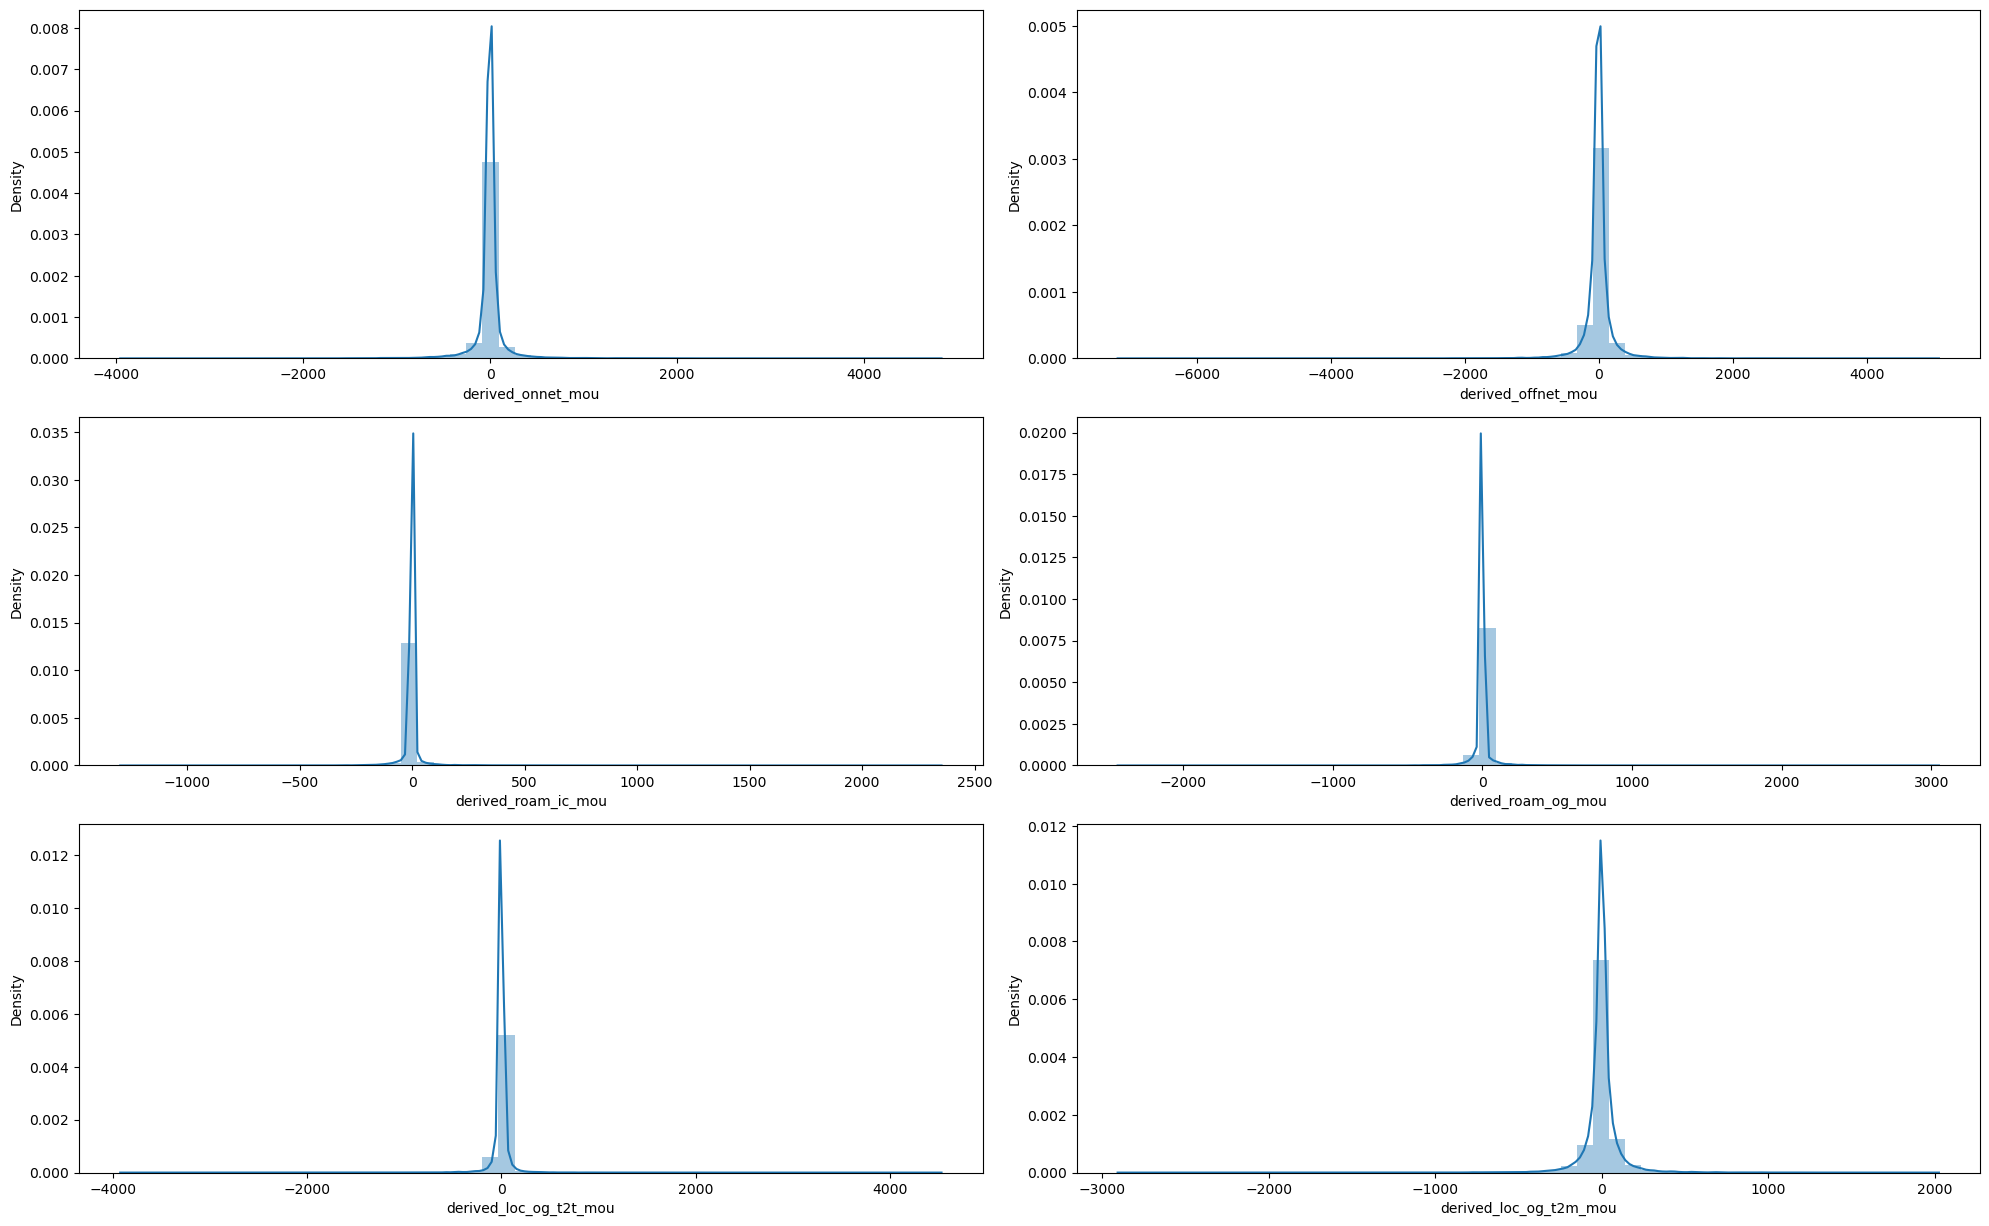

In [52]:
create_dist_plt(ftrs)

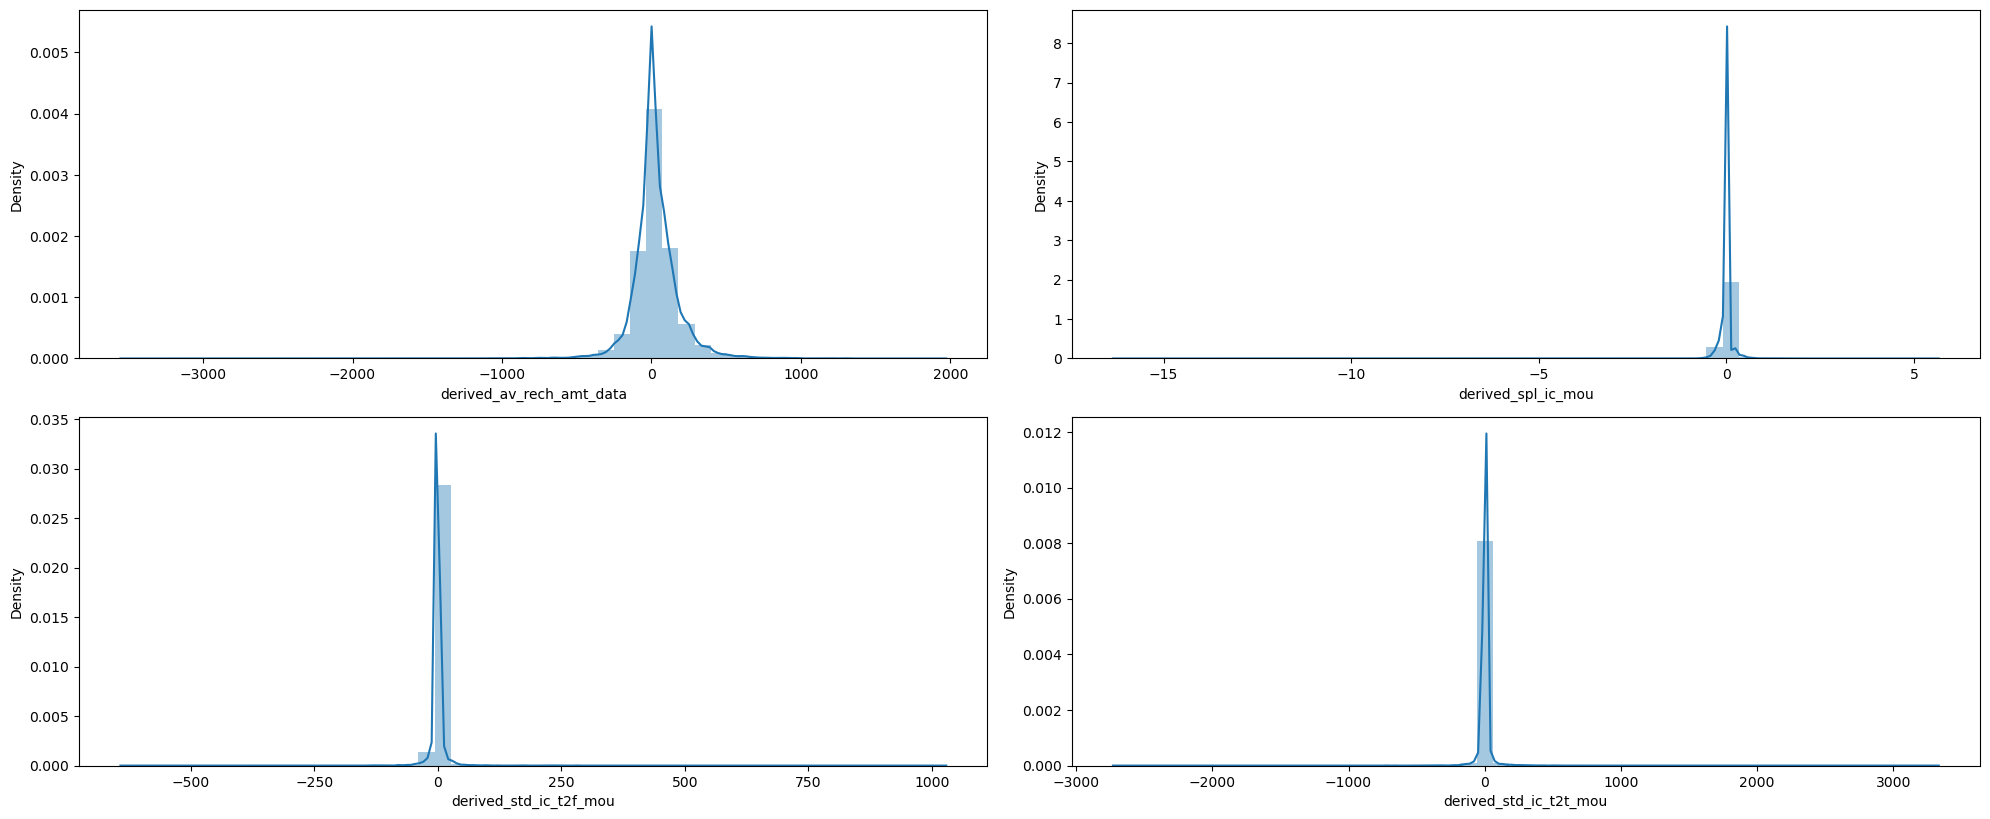

In [53]:
ftrs = ['derived_av_rech_amt_data','derived_spl_ic_mou','derived_std_ic_t2f_mou', 'derived_std_ic_t2t_mou']
create_dist_plt(ftrs)

As most of the features are skewed therefore imputing them with mode values

In [54]:
for ftr in ftr_blw_40_null_values:
    high_valued_customers_df[ftr] = high_valued_customers_df[ftr].fillna(high_valued_customers_df[ftr].mode()[0])

In [55]:
high_valued_customers_df[ftr_blw_40_null_values].isnull().sum()

aon                                 0
days_passed_since_last_rech         0
days_passed_since_last_rech_data    0
derived_arpu                        0
derived_onnet_mou                   0
derived_offnet_mou                  0
derived_roam_ic_mou                 0
derived_roam_og_mou                 0
derived_loc_og_t2t_mou              0
derived_loc_og_t2m_mou              0
derived_loc_og_t2f_mou              0
derived_loc_og_t2c_mou              0
derived_loc_og_mou                  0
derived_std_og_t2t_mou              0
derived_std_og_t2m_mou              0
derived_std_og_t2f_mou              0
derived_std_og_mou                  0
derived_isd_og_mou                  0
derived_spl_og_mou                  0
derived_og_others                   0
derived_total_og_mou                0
derived_loc_ic_t2t_mou              0
derived_loc_ic_t2m_mou              0
derived_loc_ic_t2f_mou              0
derived_loc_ic_mou                  0
derived_std_ic_t2t_mou              0
derived_std_

Now, our data looks good as we have treated all the null values

## Handling Outliers

In [56]:
high_valued_customers_df.shape

(30378, 46)

As we have lots of columns we can divide into batches of 10, 10, 10, 10, 6 and analys them

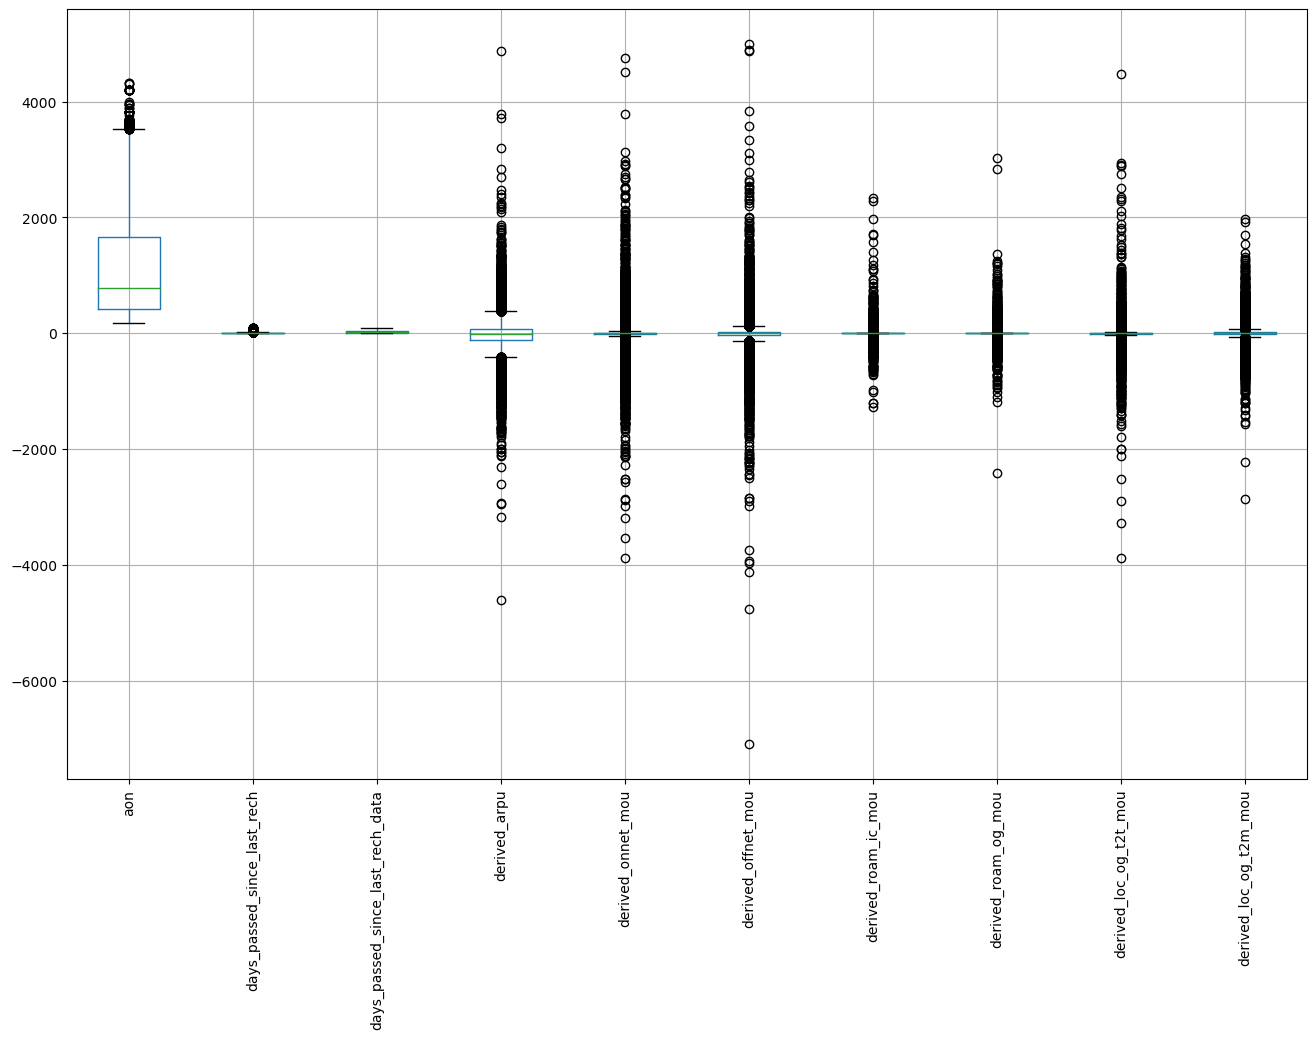

In [57]:
plt.figure(figsize=(16,10))
high_valued_customers_df.iloc[:,:10].boxplot()
plt.xticks(rotation=90);

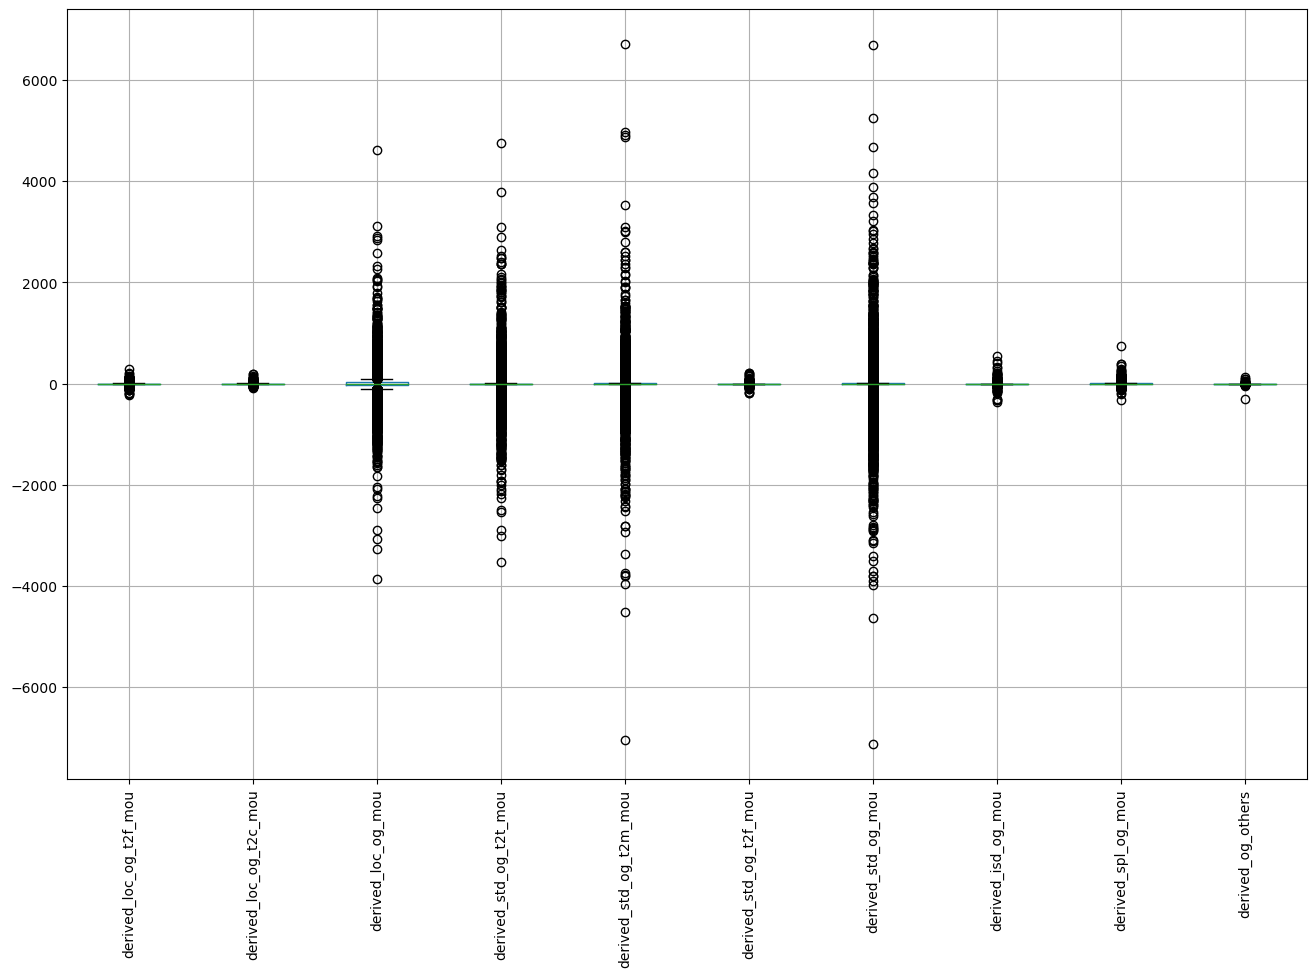

In [58]:
plt.figure(figsize=(16,10))
high_valued_customers_df.iloc[:,10:20].boxplot()
plt.xticks(rotation=90);

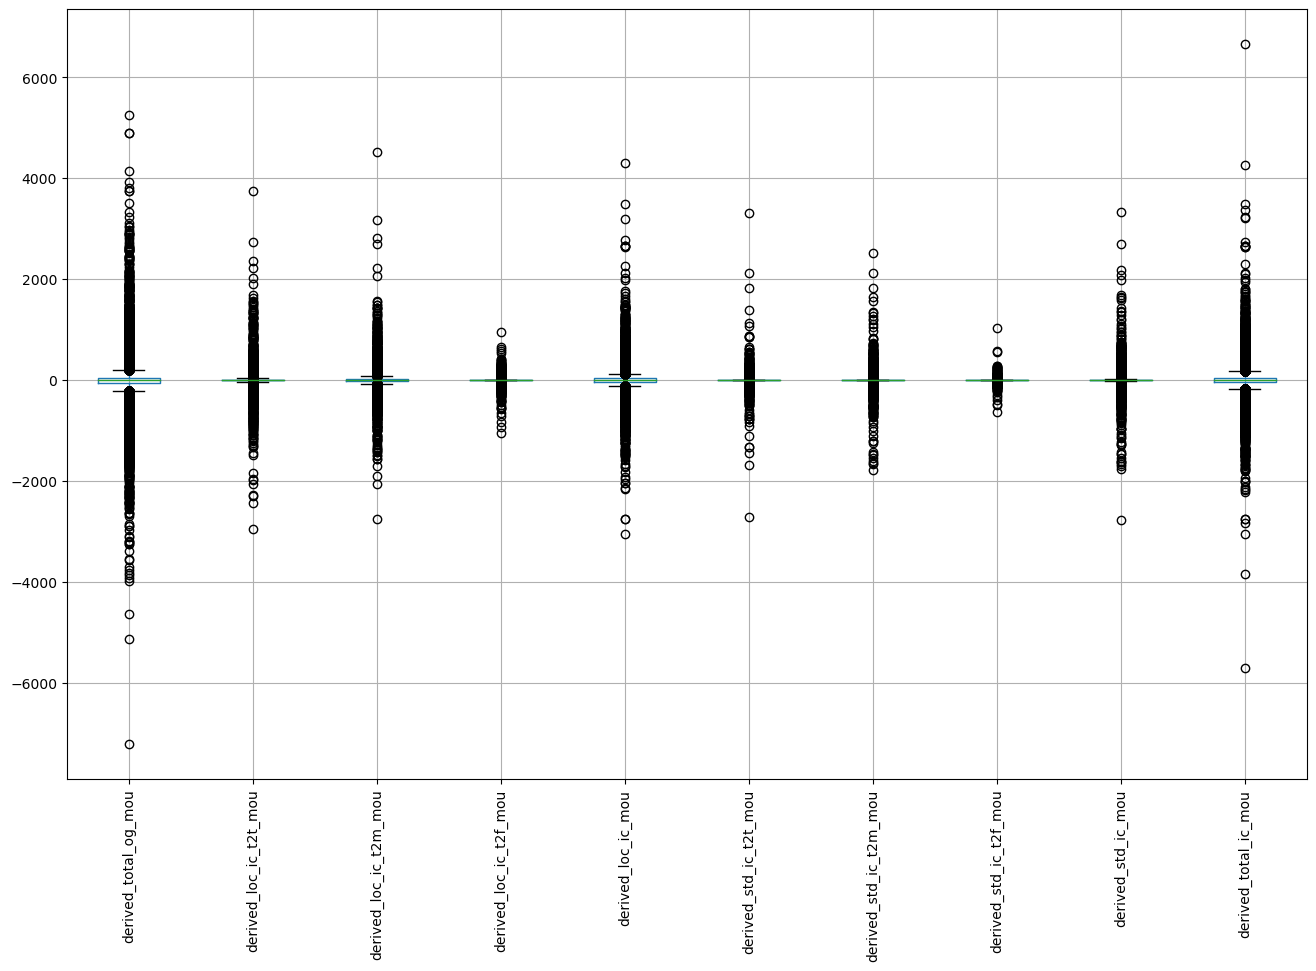

In [59]:
plt.figure(figsize=(16,10))
high_valued_customers_df.iloc[:,20:30].boxplot()
plt.xticks(rotation=90);

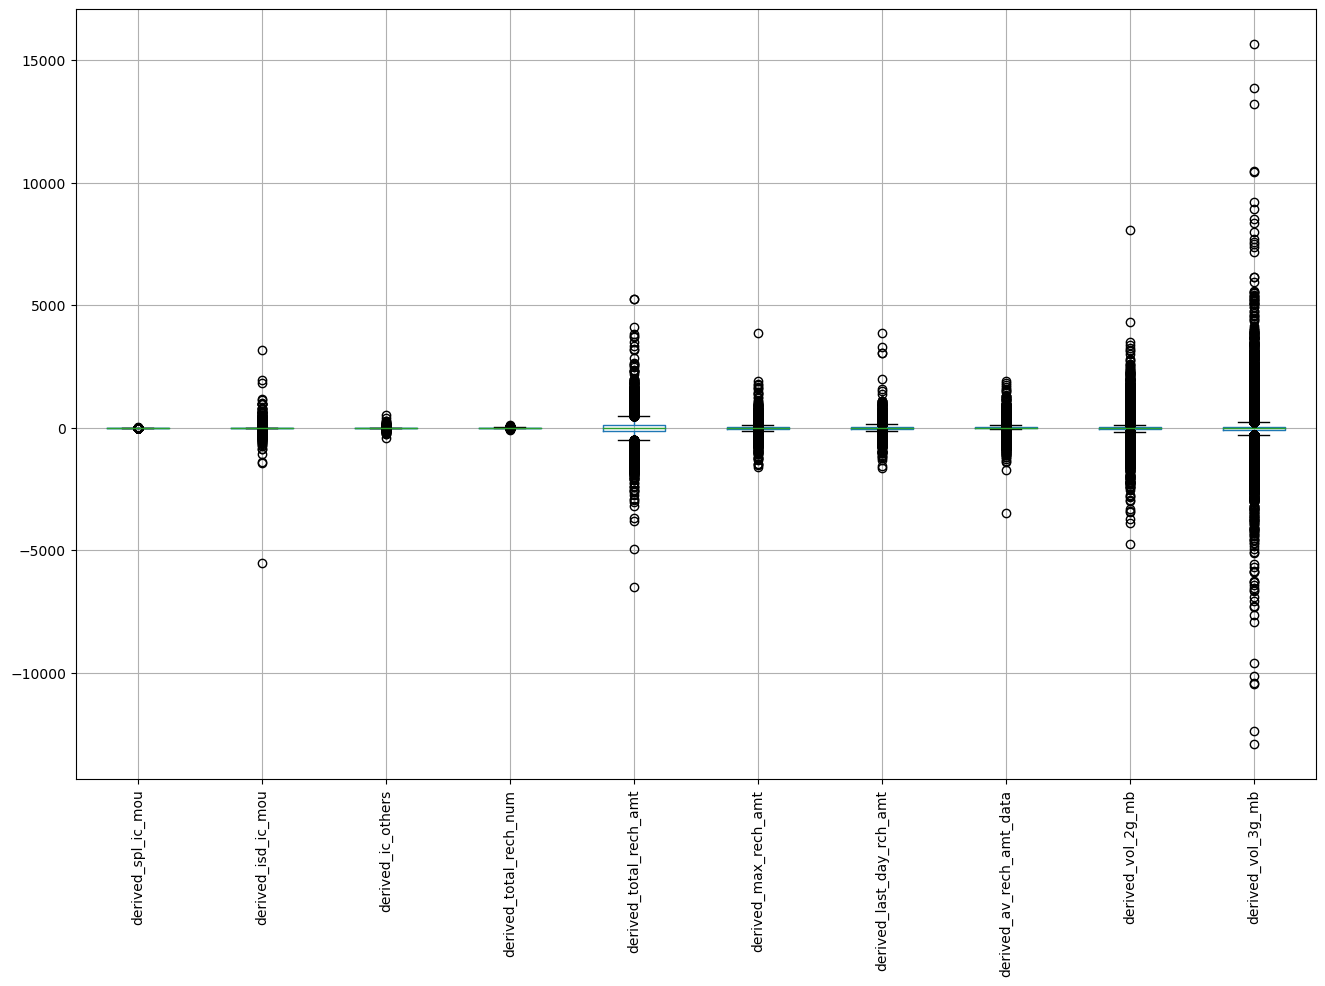

In [60]:
plt.figure(figsize=(16,10))
high_valued_customers_df.iloc[:,30:40].boxplot()
plt.xticks(rotation=90);

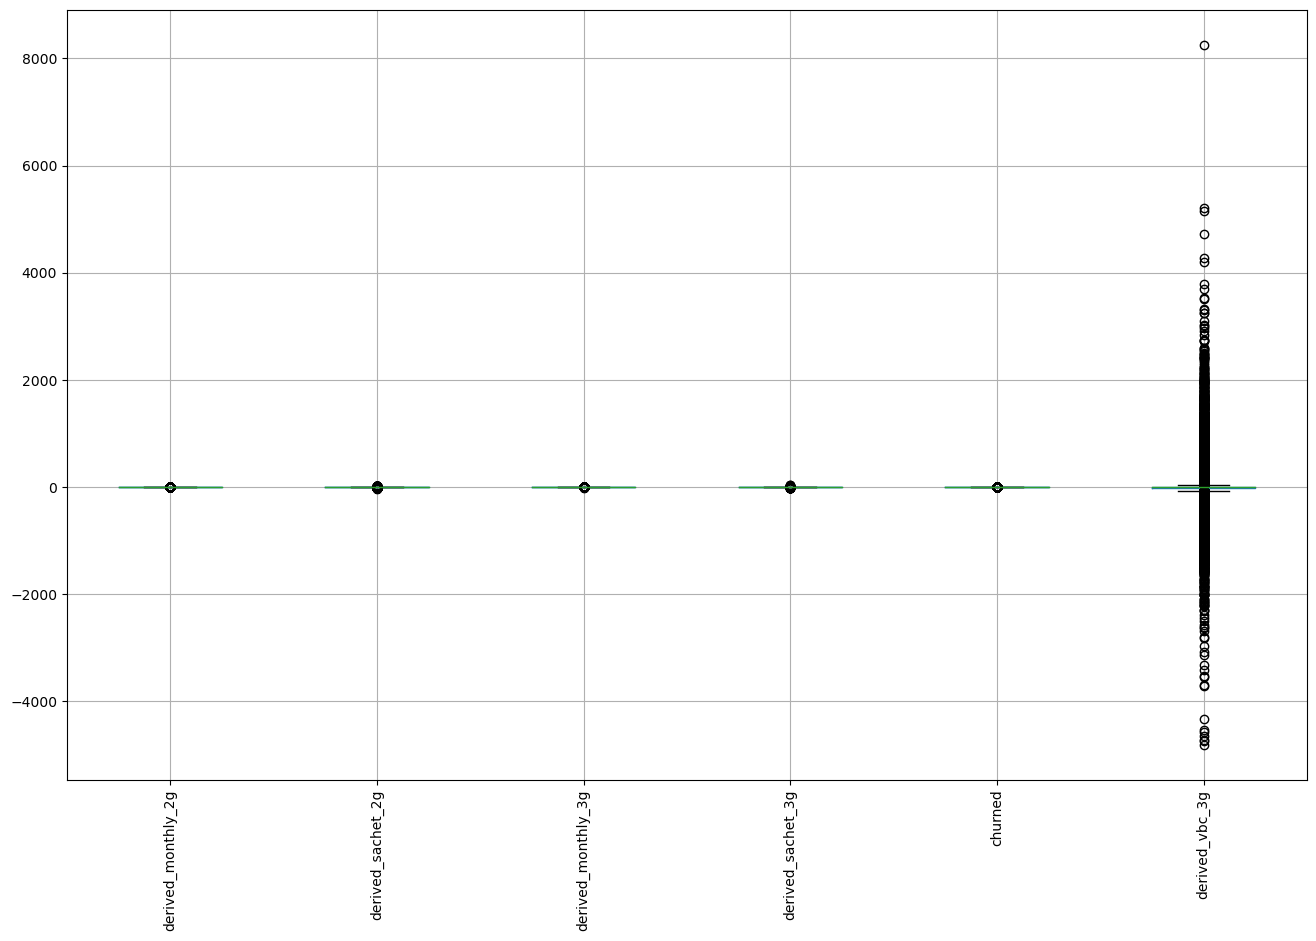

In [61]:
plt.figure(figsize=(16,10))
high_valued_customers_df.iloc[:,40:46].boxplot()
plt.xticks(rotation=90);

As we have lots of outliers, this will impact our final. Therefore we need to cap these outliers

In [62]:
for x in high_valued_customers_df.drop(['churned'],axis=1).columns:
    Q1 = high_valued_customers_df[x].quantile(0.25)
    Q3 = high_valued_customers_df[x].quantile(0.75)
    IQR = Q3 - Q1
    high_valued_customers_df[x].loc[(high_valued_customers_df[x] < (Q1 - 1.5*IQR))] = Q1 - 1.5*IQR
    high_valued_customers_df[x].loc[(high_valued_customers_df[x] > (Q3 + 1.5*IQR))] = Q3 + 1.5*IQR

## Correlation check

In [63]:
high_valued_customers_df.shape

(30378, 46)

In [64]:
high_valued_customers_df.columns

Index(['aon', 'days_passed_since_last_rech',
       'days_passed_since_last_rech_data', 'derived_arpu', 'derived_onnet_mou',
       'derived_offnet_mou', 'derived_roam_ic_mou', 'derived_roam_og_mou',
       'derived_loc_og_t2t_mou', 'derived_loc_og_t2m_mou',
       'derived_loc_og_t2f_mou', 'derived_loc_og_t2c_mou',
       'derived_loc_og_mou', 'derived_std_og_t2t_mou',
       'derived_std_og_t2m_mou', 'derived_std_og_t2f_mou',
       'derived_std_og_mou', 'derived_isd_og_mou', 'derived_spl_og_mou',
       'derived_og_others', 'derived_total_og_mou', 'derived_loc_ic_t2t_mou',
       'derived_loc_ic_t2m_mou', 'derived_loc_ic_t2f_mou',
       'derived_loc_ic_mou', 'derived_std_ic_t2t_mou',
       'derived_std_ic_t2m_mou', 'derived_std_ic_t2f_mou',
       'derived_std_ic_mou', 'derived_total_ic_mou', 'derived_spl_ic_mou',
       'derived_isd_ic_mou', 'derived_ic_others', 'derived_total_rech_num',
       'derived_total_rech_amt', 'derived_max_rech_amt',
       'derived_last_day_rch_amt', '

As we have lots of columns, we will check the correlation in batches

In [65]:
first_batch = high_valued_customers_df.columns[:23]
# appending the churned column
first_batch = first_batch.append(high_valued_customers_df.columns[-2:-1])
first_batch

Index(['aon', 'days_passed_since_last_rech',
       'days_passed_since_last_rech_data', 'derived_arpu', 'derived_onnet_mou',
       'derived_offnet_mou', 'derived_roam_ic_mou', 'derived_roam_og_mou',
       'derived_loc_og_t2t_mou', 'derived_loc_og_t2m_mou',
       'derived_loc_og_t2f_mou', 'derived_loc_og_t2c_mou',
       'derived_loc_og_mou', 'derived_std_og_t2t_mou',
       'derived_std_og_t2m_mou', 'derived_std_og_t2f_mou',
       'derived_std_og_mou', 'derived_isd_og_mou', 'derived_spl_og_mou',
       'derived_og_others', 'derived_total_og_mou', 'derived_loc_ic_t2t_mou',
       'derived_loc_ic_t2m_mou', 'churned'],
      dtype='object')

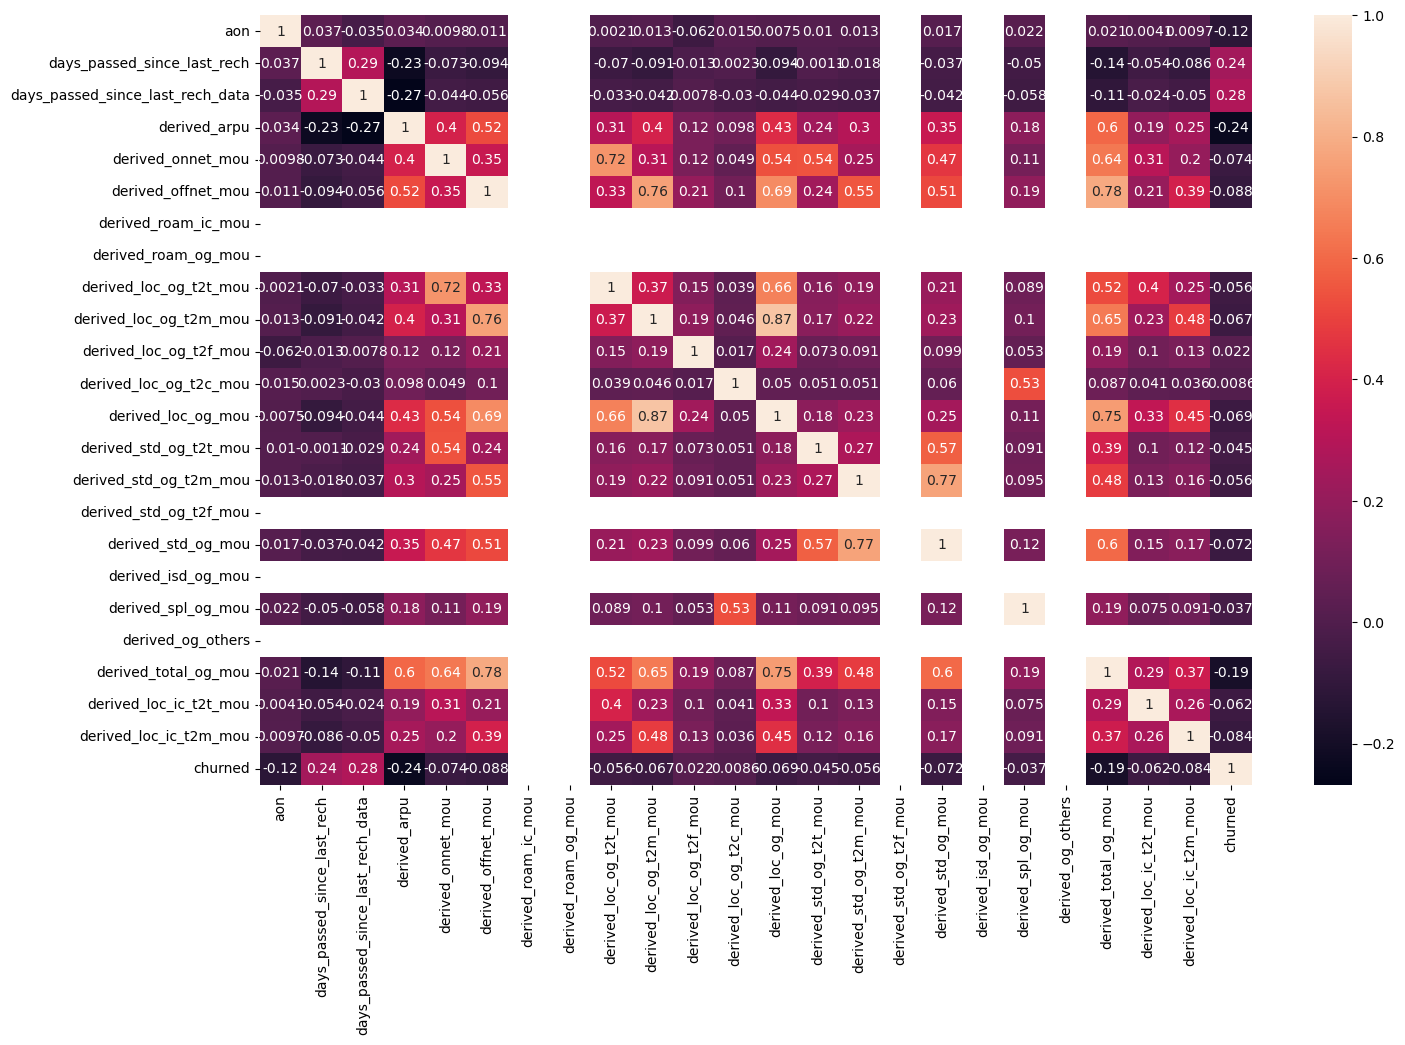

In [66]:
# Checking the correlation among first batch of features
plt.figure(figsize=(16,10))
sns.heatmap(high_valued_customers_df[first_batch].corr(),annot=True);

In [67]:
second_batch = high_valued_customers_df.columns[23:]
second_batch

Index(['derived_loc_ic_t2f_mou', 'derived_loc_ic_mou',
       'derived_std_ic_t2t_mou', 'derived_std_ic_t2m_mou',
       'derived_std_ic_t2f_mou', 'derived_std_ic_mou', 'derived_total_ic_mou',
       'derived_spl_ic_mou', 'derived_isd_ic_mou', 'derived_ic_others',
       'derived_total_rech_num', 'derived_total_rech_amt',
       'derived_max_rech_amt', 'derived_last_day_rch_amt',
       'derived_av_rech_amt_data', 'derived_vol_2g_mb', 'derived_vol_3g_mb',
       'derived_monthly_2g', 'derived_sachet_2g', 'derived_monthly_3g',
       'derived_sachet_3g', 'churned', 'derived_vbc_3g'],
      dtype='object')

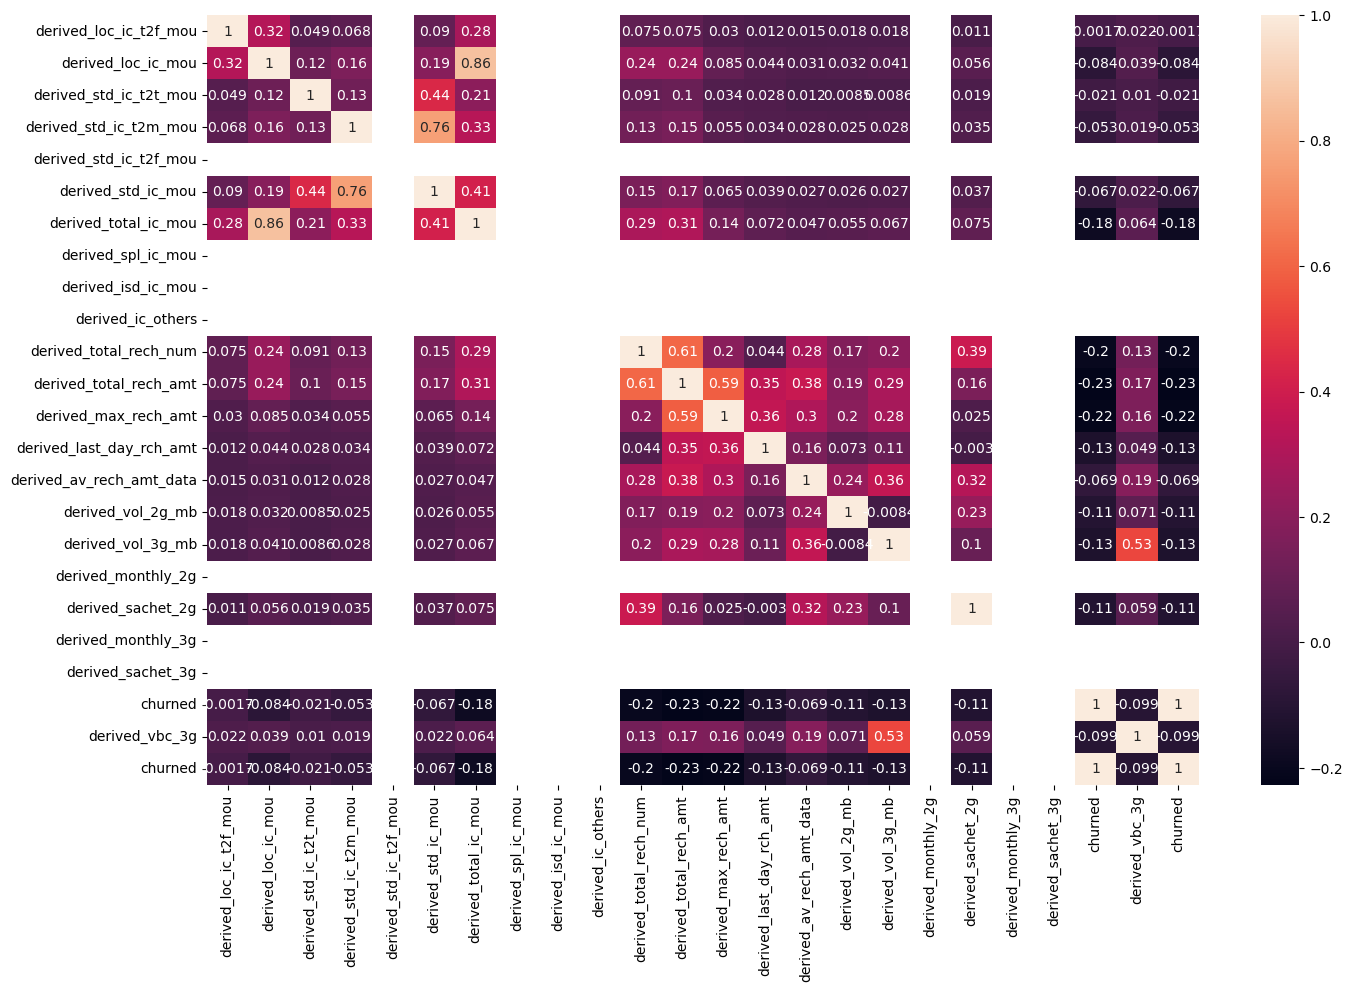

In [68]:
second_batch = high_valued_customers_df.columns[23:]
# appending the churned column
second_batch = second_batch.append(high_valued_customers_df.columns[-2:-1])
plt.figure(figsize=(16,10))
sns.heatmap(high_valued_customers_df[second_batch].corr(),annot=True);

It is interesting to see that there are some features with constant values or value is 0 as they totally igored in heatmap.

In [69]:
high_valued_customers_df[['derived_roam_ic_mou','derived_roam_og_mou','derived_std_og_t2f_mou','derived_isd_og_mou','derived_og_others']]

derived_roam_ic_mou  derived_roam_og_mou  \
mobile_number                                             
7000842753                     0.0                  0.0   
7001865778                     0.0                  0.0   
7000142493                     0.0                  0.0   
7001524846                     0.0                  0.0   
7001864400                     0.0                  0.0   
...                            ...                  ...   
7002111859                     0.0                  0.0   
7002277044                     0.0                  0.0   
7000087541                     0.0                  0.0   
7000498689                     0.0                  0.0   
7001905007                     0.0                  0.0   

               derived_std_og_t2f_mou  derived_isd_og_mou  derived_og_others  
mobile_number                                                                 
7000842753                        0.0                 0.0                0.0  
7001865778                        0.0                 0.0                0.0  
7000142493                        0.0                 0.0                0.0  
7001524846                        0.0                 0.0                0.0  
7001864400                        0.0                 0.0                0.0  
...                               ...                 ...                ...  
7002111859                        0.0                 0.0                0.0  
7002277044                        0.0                 0.0                0.0  
7000087541                        0.0                 0.0                0.0  
7000498689                        0.0                 0.0                0.0  
7001905007                        0.0                 0.0                0.0  

[30378 rows x 5 columns]

In [70]:
high_valued_customers_df[['derived_std_ic_t2f_mou','derived_spl_ic_mou','derived_isd_ic_mou','derived_ic_others','derived_monthly_2g','derived_monthly_3g','derived_sachet_3g']]

derived_std_ic_t2f_mou  derived_spl_ic_mou  derived_isd_ic_mou  \
mobile_number                                                                   
7000842753                        0.0                 0.0                 0.0   
7001865778                        0.0                 0.0                 0.0   
7000142493                        0.0                 0.0                 0.0   
7001524846                        0.0                 0.0                 0.0   
7001864400                        0.0                 0.0                 0.0   
...                               ...                 ...                 ...   
7002111859                        0.0                 0.0                 0.0   
7002277044                        0.0                 0.0                 0.0   
7000087541                        0.0                 0.0                 0.0   
7000498689                        0.0                 0.0                 0.0   
7001905007                        0.0                 0.0                 0.0   

               derived_ic_others  derived_monthly_2g  derived_monthly_3g  \
mobile_number                                                              
7000842753                   0.0                 0.0                 0.0   
7001865778                   0.0                 0.0                 0.0   
7000142493                   0.0                 0.0                 0.0   
7001524846                   0.0                 0.0                 0.0   
7001864400                   0.0                 0.0                 0.0   
...                          ...                 ...                 ...   
7002111859                   0.0                 0.0                 0.0   
7002277044                   0.0                 0.0                 0.0   
7000087541                   0.0                 0.0                 0.0   
7000498689                   0.0                 0.0                 0.0   
7001905007                   0.0                 0.0                 0.0   

               derived_sachet_3g  
mobile_number                     
7000842753                   0.0  
7001865778                   0.0  
7000142493                   0.0  
7001524846                   0.0  
7001864400                   0.0  
...                          ...  
7002111859                   0.0  
7002277044                   0.0  
7000087541                   0.0  
7000498689                   0.0  
7001905007                   0.0  

[30378 rows x 7 columns]

In [71]:
# removing features with constant values or 0 as values as analysed above
ftrs_with_cnst_val = []
for x in high_valued_customers_df.columns:
    if len(high_valued_customers_df[x].value_counts()) == 1:
        ftrs_with_cnst_val.append(x)
        print(high_valued_customers_df[x].value_counts())
print("\n\n\nFeature with constant value (0) : ")
print(ftrs_with_cnst_val)

high_valued_customers_df.drop(ftrs_with_cnst_val,axis=1,inplace=True)

0.0    30378
Name: derived_roam_ic_mou, dtype: int64
0.0    30378
Name: derived_roam_og_mou, dtype: int64
0.0    30378
Name: derived_std_og_t2f_mou, dtype: int64
0.0    30378
Name: derived_isd_og_mou, dtype: int64
0.0    30378
Name: derived_og_others, dtype: int64
0.0    30378
Name: derived_std_ic_t2f_mou, dtype: int64
0.0    30378
Name: derived_spl_ic_mou, dtype: int64
0.0    30378
Name: derived_isd_ic_mou, dtype: int64
0.0    30378
Name: derived_ic_others, dtype: int64
0.0    30378
Name: derived_monthly_2g, dtype: int64
0.0    30378
Name: derived_monthly_3g, dtype: int64
0.0    30378
Name: derived_sachet_3g, dtype: int64



Feature with constant value (0) : 
['derived_roam_ic_mou', 'derived_roam_og_mou', 'derived_std_og_t2f_mou', 'derived_isd_og_mou', 'derived_og_others', 'derived_std_ic_t2f_mou', 'derived_spl_ic_mou', 'derived_isd_ic_mou', 'derived_ic_others', 'derived_monthly_2g', 'derived_monthly_3g', 'derived_sachet_3g']


In [72]:
high_valued_customers_df.shape

(30378, 34)

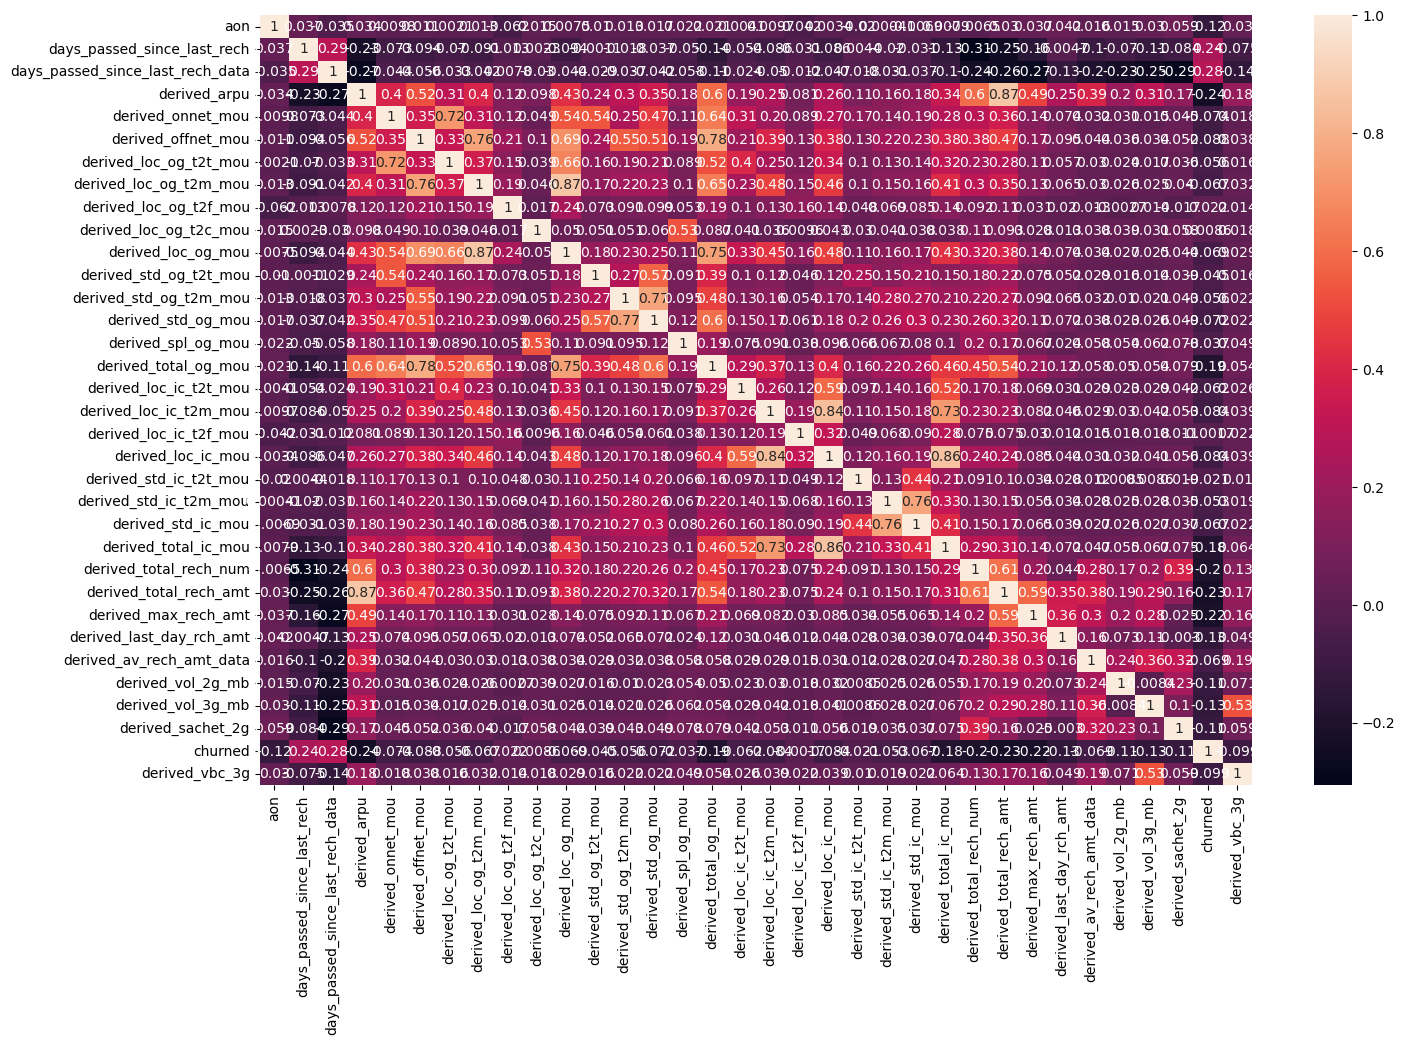

In [73]:
# checking heatmap again
plt.figure(figsize=(16,10))
sns.heatmap(high_valued_customers_df.corr(),annot=True);

## Univariate, Bivariate and multivariate analysis

Analysing 'days_passed_since_last_rech' vs 'days_passed_since_last_rech_data' for churned and non churned cases

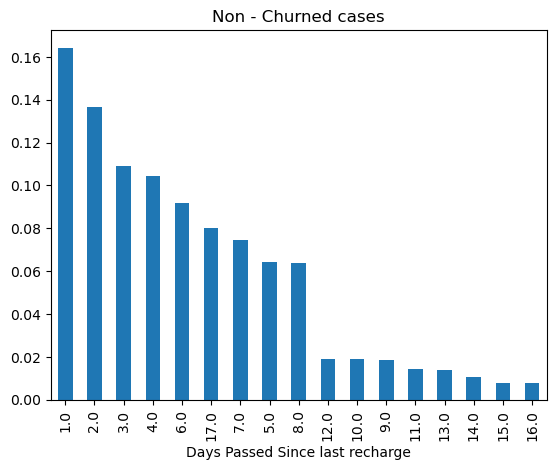

In [74]:
plt.title(label="Non - Churned cases")
high_valued_customers_df[high_valued_customers_df["churned"]==0]['days_passed_since_last_rech'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Days Passed Since last recharge");

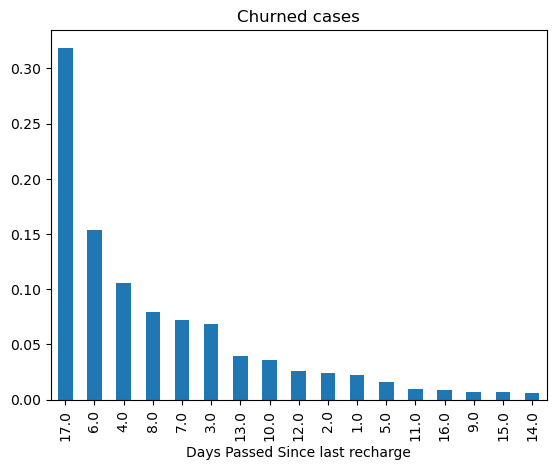

In [75]:
plt.title(label="Churned cases")
high_valued_customers_df[high_valued_customers_df["churned"]==1]['days_passed_since_last_rech'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Days Passed Since last recharge");

### Insights
- To obtain the two features mentioned above, we count how many days have passed between the last recharge date (which happens in June, July, or August) and September 1st of the same year.
- When we look at customers who have stopped using a service (churned) and those who continue to use it (non-churned), we notice that customers who haven't recharged for 17 days or longer are more likely to stop using the service. Around 31-32% of the customers who stopped using the service did their last recharge 17 days ago. In contrast, only about 7-8% of the customers who are still using the service did their last recharge 17 days ago.
- Non-churned customers usually recharge more often and have fewer days since their last recharge.

Analysing 'derived_total_rech_num' vs 'derived_total_rech_amt' for churned and non churned cases

<AxesSubplot: title={'center': 'Churned'}, xlabel='derived_total_rech_num', ylabel='derived_total_rech_amt'>

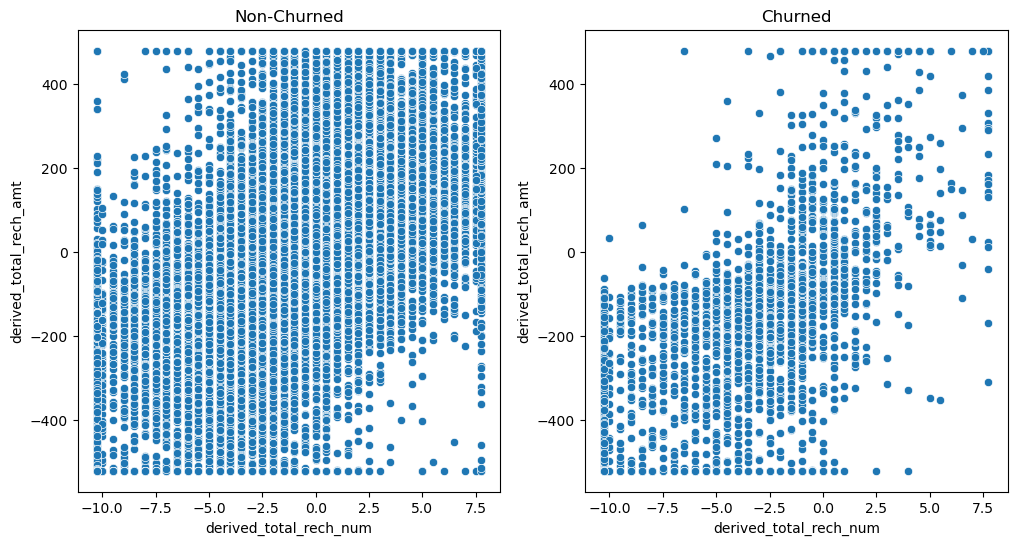

In [76]:
figure = plt.figure(figsize=(12,6))
axis1 = figure.add_subplot(1,2,1,title="Non-Churned")
axis2 = figure.add_subplot(1,2,2,title="Churned")

sns.scatterplot(y=high_valued_customers_df[high_valued_customers_df["churned"]==0]["derived_total_rech_amt"],
                x=high_valued_customers_df[high_valued_customers_df["churned"]==0]["derived_total_rech_num"], ax=axis1)
sns.scatterplot(y=high_valued_customers_df[high_valued_customers_df["churned"]==1]["derived_total_rech_amt"],
                x=high_valued_customers_df[high_valued_customers_df["churned"]==1]["derived_total_rech_num"], ax=axis2)


### Insights
- When we compare cases of customers who have churned with those who haven't, we observe a decline in both the recharge amount and the number of recharges during the action phase for the churned cases.
- In the context of recharge amount and derived_total_rech_num, a negative value indicates a decline from the good phase to the action phase. This holds true for both variables.
- In relation to recharge amount and derived_total_rech_num, a positive value signifies an increase from the good phase to the action phase. This applies equally to both variables.

Next we analyse the behaviour customer for maximum recharge they did and last day recharge amount.

<AxesSubplot: title={'center': 'Churned'}, xlabel='derived_last_day_rch_amt', ylabel='derived_max_rech_amt'>

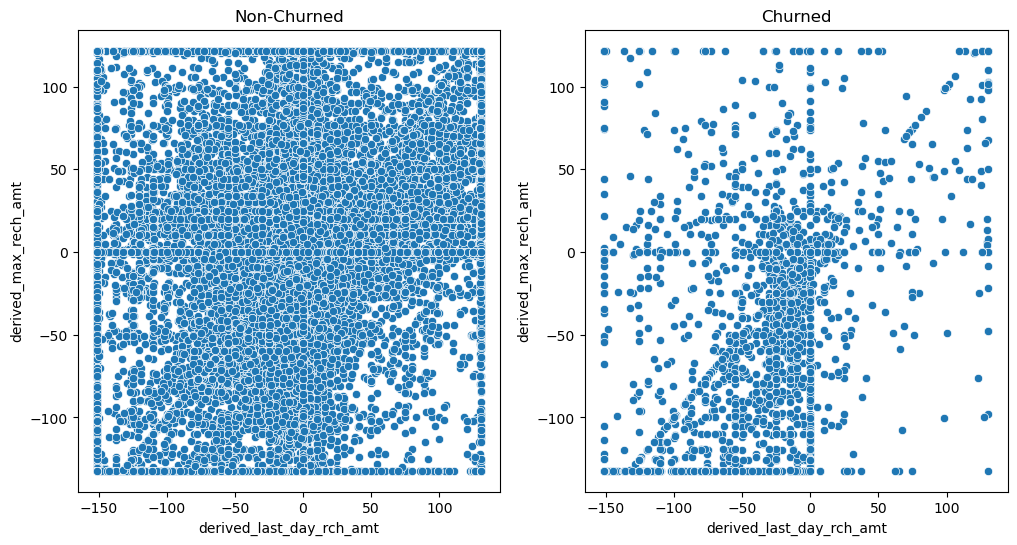

In [77]:
figure = plt.figure(figsize=(12,6))
axis1 = figure.add_subplot(1,2,1,title="Non-Churned")
axis2 = figure.add_subplot(1,2,2,title="Churned")

sns.scatterplot(y=high_valued_customers_df[high_valued_customers_df["churned"]==0]['derived_max_rech_amt'],
                x=high_valued_customers_df[high_valued_customers_df["churned"]==0]['derived_last_day_rch_amt'], ax=axis1)
sns.scatterplot(y=high_valued_customers_df[high_valued_customers_df["churned"]==1]['derived_max_rech_amt'],
                x=high_valued_customers_df[high_valued_customers_df["churned"]==1]['derived_last_day_rch_amt'], ax=axis2)

### Insights
- For the churned cases, it is highly probable that derived_max_rech_amt and derived_last_day_rch_amt are negative. This indicates a decrease in both the maximum recharge amount and the last day recharge amount during the action phase, which serves as an indication of customer churn.

Now, we will lok at how much time customers spend making STD (long-distance) and local calls, and see if there is any connection between that and whether they stop using the service or not. We will also compare the results for customers who stopped using the service and those who continue to use it.

Additionally, we will examine if thre is any noticable pattern in the recharge amount for customers who have stoped using the service.

<AxesSubplot: title={'center': 'Churned'}, xlabel='derived_loc_ic_t2m_mou', ylabel='derived_loc_og_t2m_mou'>

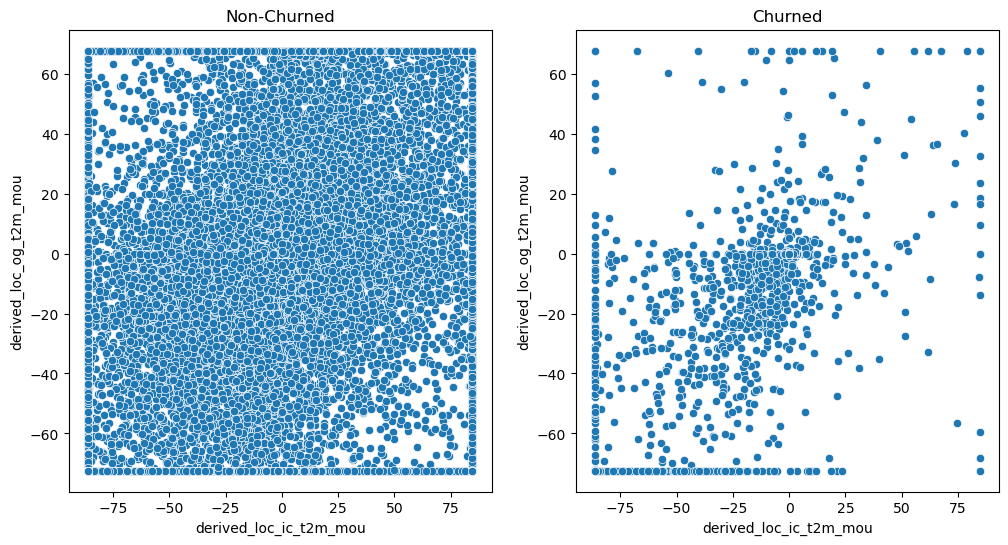

In [78]:
figure = plt.figure(figsize=(12,6))
axis1 = figure.add_subplot(1,2,1,title="Non-Churned")
axis2 = figure.add_subplot(1,2,2,title="Churned")

sns.scatterplot(y=high_valued_customers_df[high_valued_customers_df["churned"]==0]['derived_loc_og_t2m_mou'],
                x=high_valued_customers_df[high_valued_customers_df["churned"]==0]['derived_loc_ic_t2m_mou'], ax=axis1)
sns.scatterplot(y=high_valued_customers_df[high_valued_customers_df["churned"]==1]['derived_loc_og_t2m_mou'],
                x=high_valued_customers_df[high_valued_customers_df["churned"]==1]['derived_loc_ic_t2m_mou'], ax=axis2)

<AxesSubplot: title={'center': 'Churned'}, xlabel='derived_std_ic_t2t_mou', ylabel='derived_std_og_t2t_mou'>

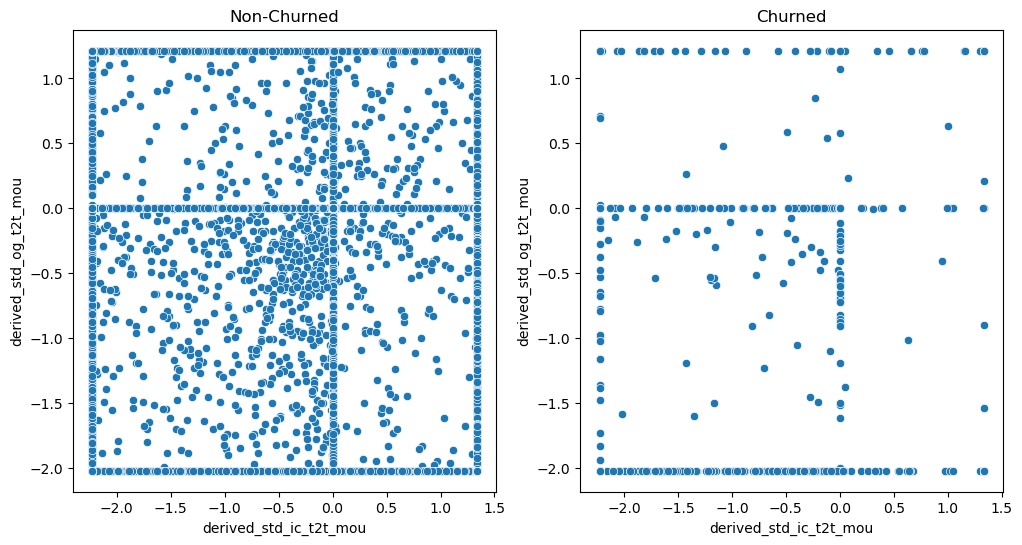

In [79]:
figure = plt.figure(figsize=(12,6))
axis1 = figure.add_subplot(1,2,1,title="Non-Churned")
axis2 = figure.add_subplot(1,2,2,title="Churned")

sns.scatterplot(y=high_valued_customers_df[high_valued_customers_df["churned"]==0]['derived_std_og_t2t_mou'],
                x=high_valued_customers_df[high_valued_customers_df["churned"]==0]['derived_std_ic_t2t_mou'], ax=axis1)
sns.scatterplot(y=high_valued_customers_df[high_valued_customers_df["churned"]==1]['derived_std_og_t2t_mou'],
                x=high_valued_customers_df[high_valued_customers_df["churned"]==1]['derived_std_ic_t2t_mou'], ax=axis2)

### Insights
- looking at the information, we cant find a clear pattern or rule that applies to both customers who stoped using the service and those who cntinue to use it for the features we mentioned earlier. So, we can't say for sure if there is connection between those features and customer churn.

## Splitting data into training and testing set

Now, we will split the dataframe or dataset into training and testing set, 

In [80]:
#extracting predictor column by dropping predicting variable/target variable
X = high_valued_customers_df.drop(['churned'],axis=1)
y = high_valued_customers_df[['churned']]

X.head()

aon  days_passed_since_last_rech  \
mobile_number                                        
7000842753      968.0                         17.0   
7001865778     1006.0                          4.0   
7000142493     1526.0                         17.0   
7001524846      315.0                          2.0   
7001864400      902.0                          3.0   

               days_passed_since_last_rech_data  derived_arpu  \
mobile_number                                                   
7000842753                                 24.0        7.7025   
7001865778                                 22.0       73.7605   
7000142493                                 89.0      -47.5820   
7001524846                                  9.0     -298.1100   
7001864400                                 40.0      -13.2455   

               derived_onnet_mou  derived_offnet_mou  derived_loc_og_t2t_mou  \
mobile_number                                                                  
7000842753               0.00000              0.0000                   0.000   
7001865778             -43.71500            119.6825                 -27.740   
7000142493             -15.98500             39.8400                 -15.985   
7001524846             -53.27625             48.8350                 -27.740   
7001864400              -9.57000             19.5200                  -9.570   

               derived_loc_og_t2m_mou  derived_loc_og_t2f_mou  \
mobile_number                                                   
7000842753                    0.00000                     0.0   
7001865778                   67.85375                     0.0   
7000142493                   44.50000                     0.0   
7001524846                  -25.23000                     0.0   
7001864400                   -4.11500                     0.0   

               derived_loc_og_t2c_mou  ...  derived_total_ic_mou  \
mobile_number                          ...                         
7000842753                      0.000  ...              5.440000   
7001865778                     -0.375  ...            167.910625   
7000142493                      0.000  ...            131.445000   
7001524846                      0.225  ...            -49.635000   
7001864400                      0.000  ...            -95.785000   

               derived_total_rech_num  derived_total_rech_amt  \
mobile_number                                                   
7000842753                       -1.5                   -55.0   
7001865778                        4.5                    54.0   
7000142493                       -2.5                    14.0   
7001524846                       -6.0                  -399.0   
7001864400                        2.0                     2.5   

               derived_max_rech_amt  derived_last_day_rch_amt  \
mobile_number                                                   
7000842753                      0.0                       0.0   
7001865778                    -34.0                      -3.5   
7000142493                     27.0                      30.0   
7001524846                    -92.0                     -15.0   
7001864400                    -82.0                    -102.0   

               derived_av_rech_amt_data  derived_vol_2g_mb  derived_vol_3g_mb  \
mobile_number                                                                   
7000842753                          0.0           -9.97500          -7.555000   
7001865778                        -27.0          124.10375           0.000000   
7000142493                          0.0            0.00000           0.000000   
7001524846                        -19.5         -177.97000        -288.208125   
7001864400                          0.0           -3.68500           0.000000   

               derived_sachet_2g  derived_vbc_3g  
mobile_number                                     
7000842753                  0.00       -20.20000  
7001865778                  0.75         0.00000  
70001

In [81]:
y.head()

churned
mobile_number         
7000842753           1
7001865778           0
7000142493           0
7001524846           0
7001864400           0

In [82]:
# creating test and training set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=45)

## Feature Scaling

Before moving further we need to scale the data.

In [83]:
#initialize scaler as StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

## Treating imbalance in data

In [84]:
#checking the imbalance in our dataset
y_train.value_counts()

churned
0          22124
1           2178
dtype: int64

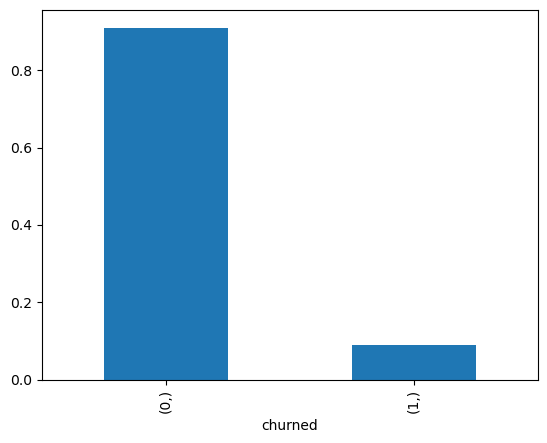

In [85]:
y_train.value_counts(normalize=True).plot(kind="bar");

As we can see we have highly imbalanced dataset, and more biased toward non-churned. Whereas our business problem
is more about predicting churned cases.
Hence we need to fix this the problem before moving to model building phase. 
To handle this the technique we are going to use is **SMOTE** (Synthetic Minority Oversampling Technique)

In [86]:
print("Data before Oversampling: ",y_train.value_counts())

Data before Oversampling:  churned
0          22124
1           2178
dtype: int64


In [87]:
smote = SMOTE()
X_train_smt, y_train_smt = smote.fit_resample(X_train_sc,y_train)

In [88]:
print("Data after Oversampling: ", y_train_smt.value_counts())

Data after Oversampling:  churned
0          22124
1          22124
dtype: int64


Now as our data preparation is done and class imbalance problem is handled. We can move ahead with Building Predictive model

# 2. PCA and Building Predictor Model

First we need to work on reducing the dimensionality of the dataset using PCA in predictor variable. Then we will go with different models from simple to complex one (Logistic Regression, Decision Tree to Random Forests)

## Finding Optimum number of principal components

While performing PCA we need to capture the maximum variance while having less number of pca.
We are going to from 0.8 to 0.9 and see which give maximum auc_roc_score

In [89]:
# creating pca with variance of 0.9
for n in [0.7,0.8,0.85,0.9,0.95,0.99]:
    pca = PCA(n)
    X_train_pca = pca.fit_transform(X_train_smt)
    X_test_pca = pca.transform(X_test_sc)
    
    lr = LogisticRegression()
    lr.fit(X_train_pca,y_train_smt)
    y_test_prob = lr.predict_proba(X_test_pca)
    
    y_test_prob = y_test_prob[:,1]
    
    print("auc_roc_score: ",metrics.roc_auc_score(y_test,y_test_prob))
    print("pca: ",X_test_pca.shape, " variance: ",n)

auc_roc_score:  0.8510580449082052
pca:  (6076, 10)  variance:  0.7
auc_roc_score:  0.8525608513002736
pca:  (6076, 14)  variance:  0.8
auc_roc_score:  0.8531227558832727
pca:  (6076, 16)  variance:  0.85
auc_roc_score:  0.8562888657535801
pca:  (6076, 19)  variance:  0.9
auc_roc_score:  0.8557826572846727
pca:  (6076, 23)  variance:  0.95
auc_roc_score:  0.8589448124013166
pca:  (6076, 29)  variance:  0.99


After analysing the auc roc score for various variances, we can see for variance of 0.9 we good auc roc score of 0.856 with number of principal components of 19. So we are going to use variance of 0.9

In [90]:
pca = PCA(0.9)
X_train_pca = pca.fit_transform(X_train_smt)
X_test_pca = pca.transform(X_test_sc)
X_train_pca.shape

(44248, 19)

## Build Logistic Regression Model

In [91]:
# building logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train_pca,y_train_smt)
y_test_prob = lr.predict_proba(X_test_pca)

In [92]:
y_test_prob = y_test_prob[:,1]
y_test_prob

array([0.92306392, 0.04251294, 0.37994837, ..., 0.60663677, 0.82800841,
       0.48759678])

In [93]:
# Calculating the Roc auc Score
metrics.roc_auc_score(y_test,y_test_prob)

0.8562888657535801

A score of 0.8565 is good score, with 19 pca's which capture the variance of 0.9.

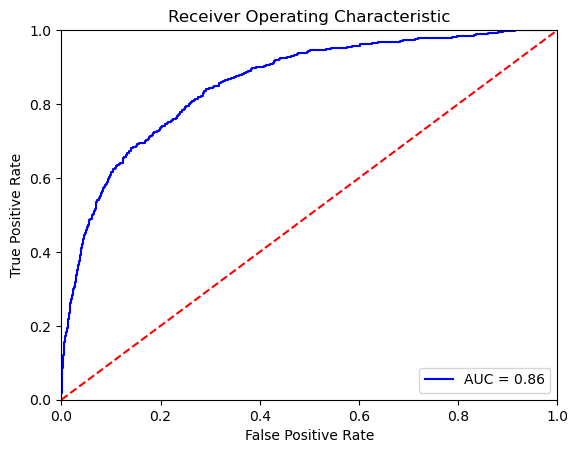

In [94]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Finding the threshold/cutoff for which TPR - FPR is maximum i,e TPR is maximum and FPR is minimum

In [95]:
optimal_index = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_index]
print("Optimal Value of Threshold: ",optimal_threshold)

Optimal Value of Threshold:  0.40498260783778883


In [96]:
df = pd.DataFrame(y_test_prob,columns=["predicted_prob"])
df['Predicted'] = df["predicted_prob"].map(lambda x: 1 if x > optimal_threshold else 0)
df

predicted_prob  Predicted
0           0.923064          1
1           0.042513          0
2           0.379948          0
3           0.035754          0
4           0.182013          0
...              ...        ...
6071        0.030681          0
6072        0.785795          1
6073        0.606637          1
6074        0.828008          1
6075        0.487597          1

[6076 rows x 2 columns]

Calculating the accuracy and sensitivity

In [97]:
def model_evaluate(y_true, y_pred):
    confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
    TP = confusion_matrix[1,1]
    TN = confusion_matrix[0,0]
    FP = confusion_matrix[0,1]
    FN = confusion_matrix[1,0]
    sensitivity_sc = TP/float(TP+FN)
    accuracy_sc = metrics.accuracy_score(y_true, y_pred)
    return accuracy_sc, sensitivity_sc

In [98]:
accuracy_sc, senstivity_score = model_evaluate(y_test, df['Predicted'])
print("accuracy: ",accuracy_sc)
print("sensitivity : ", senstivity_score)

accuracy:  0.7200460829493087
sensitivity :  0.8397085610200364


In [99]:
model_metrics_df = pd.DataFrame()
model_metrics_df['model'] = ["LogisticRegression"]
model_metrics_df["accuracy"] = accuracy_sc
model_metrics_df["sensitivity"] = senstivity_score
model_metrics_df

model  accuracy  sensitivity
0  LogisticRegression  0.720046     0.839709

- We want to figure out if customers might stop using our product, so we'll focus on a measure called sensitivity to see how well our predictions work. The higher the sensitivity, the better our model is at catching potential customers who might leave or **Churn**.

## Build Decision Tree Model

Now we will build Decision Tree to see how it perform as compared Logistic Regression. We will use GridSearchCV for tuning the hyperparameter and obtaining the best estimator.

In [100]:
dt_model = DecisionTreeClassifier(random_state=42)
params = {
    "max_depth": [5,10,15,20],
    "min_samples_leaf": [5, 25, 50, 75, 100],
    "criterion": ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt_model,
                          param_grid=params,
                          cv=5, n_jobs=-1,
                          verbose=1,
                          scoring="recall")
grid_search.fit(X_train_pca, y_train_smt)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [5, 25, 50, 75, 100]},
             scoring='recall', verbose=1)

In [101]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5}

In [102]:
dt_best_estm = grid_search.best_estimator_
dt_best_estm.fit(X_train_pca,y_train_smt)
y_test_pred = dt_best_estm.predict(X_test_pca)
y_test_pred

array([1, 0, 0, ..., 0, 0, 1])

In [103]:
accuracy_sc, senstivity_score = model_evaluate(y_test, y_test_pred)

In [104]:
model_metrics_df = model_metrics_df.append({"model": "DecisionTree", "accuracy": accuracy_sc,"sensitivity": senstivity_score},ignore_index=True)
model_metrics_df

model  accuracy  sensitivity
0  LogisticRegression  0.720046     0.839709
1        DecisionTree  0.824556     0.708561

## Build Random Forest Classifier model

In [105]:
rf_model = RandomForestClassifier(random_state=41, n_jobs=-1)

params = {
    "max_depth": [10,20,30],
    "min_samples_leaf": [5, 50, 100],
    "max_features": [3,4,5],
    "n_estimators" : [50,100]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=params,
                          cv=3, n_jobs=-1, verbose=1, scoring='recall')
grid_search.fit(X_train_pca,y_train_smt.values.ravel())
rf_best_estmtr = grid_search.best_estimator_


Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [106]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 5,
 'min_samples_leaf': 5,
 'n_estimators': 100}

In [107]:
rf_best_estmtr.fit(X_train_pca,y_train_smt)
y_test_pred = rf_best_estmtr.predict(X_test_pca)
y_test_pred

array([1, 0, 0, ..., 0, 0, 0])

In [108]:
accuracy_sc, senstivity_score = model_evaluate(y_test, y_test_pred)
model_metrics_df = model_metrics_df.append({"model": "RandomForest", "accuracy": accuracy_sc,"sensitivity": senstivity_score},ignore_index=True)
model_metrics_df

model  accuracy  sensitivity
0  LogisticRegression  0.720046     0.839709
1        DecisionTree  0.824556     0.708561
2        RandomForest  0.902732     0.701275

## Build XGBoost classifier model

In [109]:
xg_boost_clf = xgb.XGBClassifier()

params = {
    "learning_rate": [0.2,0.3,0.4],
    "max_depth": [10,20],
    "n_estimators" : [100,200,500]
}

grid_search = GridSearchCV(estimator=xg_boost_clf, param_grid=params, n_jobs=-1, cv=3,scoring="recall",verbose=1,
                          refit=True)
grid_search.fit(X_train_pca, y_train_smt.values.ravel())

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.3, 0.4],
                         'max_depth': [10, 20],
                         'n_estimators': [100, 200, 500]},
             scoring='recall', verbose=1)

In [110]:
grid_search.best_params_

{'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 500}

In [111]:
xgb_best_estmt = grid_search.best_estimator_

In [112]:
xgb_best_estmt.fit(X_train_pca,y_train_smt)
y_test_pred = xgb_best_estmt.predict(X_test_pca)
y_test_pred

array([1, 0, 0, ..., 0, 0, 0])

In [113]:
accuracy_sc, senstivity_score = model_evaluate(y_test, y_test_pred)
model_metrics_df = model_metrics_df.append({"model": "XG_Boost", "accuracy": accuracy_sc,"sensitivity": senstivity_score},ignore_index=True)
model_metrics_df

model  accuracy  sensitivity
0  LogisticRegression  0.720046     0.839709
1        DecisionTree  0.824556     0.708561
2        RandomForest  0.902732     0.701275
3            XG_Boost  0.913594     0.602914

## Compare models with metrics and finalize the model

In [114]:
model_metrics_df

model  accuracy  sensitivity
0  LogisticRegression  0.720046     0.839709
1        DecisionTree  0.824556     0.708561
2        RandomForest  0.902732     0.701275
3            XG_Boost  0.913594     0.602914

- After conducting a comparison of the accuracy and sensitivity scores among various models, including Logistic Regression, Decision Tree Classifier, Random Forest Classifier, and XGBoost, it is noticed that:
   - In terms of sensitivity score and accuracy score, Logistic Regression demonstrates the highest sensitivity score and the lowest accuracy score.
   - In our situation, it's really important to predict as many customer leaving as possible so that we can come up with strategies to keep them from leaving. That's why we focus more on sensitivity than accuracy.
   - The Logistic Regression model, using a cutoff of around **0.4** and **19** principal components, was able to achieve a sensitivity of 0.83 on the test data. This means that it could correctly predict 83% of the total cases where people decided to leave when applied to new, unseen data.
   
- **Final Model : Logistic Regression**
- **No of Principal Components : 19**
- **Threshold / Cutoff : 0.4**

# 3. Building Interpretable model

We will move ahead with building interpretable model

## Getting top features using RFE

we will start with RFE to identify top 20 features, then manually use p-value and VIF to improvise the model further.

Logistic regression model has good interpretability also Logistic Regression model performed better with respect to sensitivity.

In [128]:
X_train_sc_df = pd.DataFrame(data=X_train_sc,columns=X.columns)
lr = LogisticRegression()
rfe = RFE(estimator=lr, n_features_to_select=20)
rfe = rfe.fit(X_train_sc_df, y_train)

for item in list(zip(X_train_sc_df.columns, rfe.support_, rfe.ranking_)):
    print (item)

('aon', True, 1)
('days_passed_since_last_rech', True, 1)
('days_passed_since_last_rech_data', True, 1)
('derived_arpu', True, 1)
('derived_onnet_mou', True, 1)
('derived_offnet_mou', True, 1)
('derived_loc_og_t2t_mou', False, 7)
('derived_loc_og_t2m_mou', False, 6)
('derived_loc_og_t2f_mou', True, 1)
('derived_loc_og_t2c_mou', True, 1)
('derived_loc_og_mou', True, 1)
('derived_std_og_t2t_mou', False, 12)
('derived_std_og_t2m_mou', False, 14)
('derived_std_og_mou', True, 1)
('derived_spl_og_mou', False, 13)
('derived_total_og_mou', True, 1)
('derived_loc_ic_t2t_mou', True, 1)
('derived_loc_ic_t2m_mou', True, 1)
('derived_loc_ic_t2f_mou', False, 8)
('derived_loc_ic_mou', True, 1)
('derived_std_ic_t2t_mou', False, 9)
('derived_std_ic_t2m_mou', False, 10)
('derived_std_ic_mou', False, 11)
('derived_total_ic_mou', True, 1)
('derived_total_rech_num', False, 4)
('derived_total_rech_amt', False, 3)
('derived_max_rech_amt', True, 1)
('derived_last_day_rch_amt', True, 1)
('derived_av_rech_amt_d

In [129]:
def build_lr_model(X,y):
    X = sm.add_constant(X)
    log_model = sm.GLM(y,X,family=sm.families.Binomial())
    res = log_model.fit()
    print(res.summary())
    
def calculate_vif(X):
    vif = pd.DataFrame(data=X.columns, columns=['Features'])
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in  range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by="VIF", ascending=False)
    print(vif)

In [130]:
top_20 = X_train_sc_df.columns[rfe.support_]
build_lr_model(X_train_sc_df[top_20],y_train.values)
calculate_vif(X_train_sc_df[top_20])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                24302
Model:                            GLM   Df Residuals:                    24281
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5205.7
Date:                Sat, 08 Jul 2023   Deviance:                       10411.
Time:                        13:08:04   Pearson chi2:                 3.53e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1605
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [131]:
#dropping features with highest VIF values > 2.5
top_19 = top_20.drop('derived_loc_ic_mou')
build_lr_model(X_train_sc_df[top_19],y_train.values)
calculate_vif(X_train_sc_df[top_19])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                24302
Model:                            GLM   Df Residuals:                    24282
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5234.7
Date:                Sat, 08 Jul 2023   Deviance:                       10469.
Time:                        13:08:08   Pearson chi2:                 3.42e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1585
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [132]:
top_18 = top_19.drop('derived_total_og_mou')
build_lr_model(X_train_sc_df[top_18],y_train.values)
calculate_vif(X_train_sc_df[top_18])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                24302
Model:                            GLM   Df Residuals:                    24283
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5334.6
Date:                Sat, 08 Jul 2023   Deviance:                       10669.
Time:                        13:08:12   Pearson chi2:                 3.05e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1515
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [133]:
top_17 = top_18.drop('derived_offnet_mou')
build_lr_model(X_train_sc_df[top_17],y_train.values)
calculate_vif(X_train_sc_df[top_17])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                24302
Model:                            GLM   Df Residuals:                    24284
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5334.6
Date:                Sat, 08 Jul 2023   Deviance:                       10669.
Time:                        13:08:16   Pearson chi2:                 3.04e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1515
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

Right now the VIF look descent, now need to drop columns with high p-value i.e greater than 0.05

In [134]:
# removing column with p-value > 0.05
top_16 = top_17.drop('derived_onnet_mou')
build_lr_model(X_train_sc_df[top_16],y_train.values)
calculate_vif(X_train_sc_df[top_16])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                24302
Model:                            GLM   Df Residuals:                    24285
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5334.8
Date:                Sat, 08 Jul 2023   Deviance:                       10670.
Time:                        13:08:28   Pearson chi2:                 3.04e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1515
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [135]:
# removing column with p-value > 0.05
top_15 = top_16.drop('derived_std_og_mou')
build_lr_model(X_train_sc_df[top_15],y_train.values)
calculate_vif(X_train_sc_df[top_15])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                24302
Model:                            GLM   Df Residuals:                    24286
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5336.2
Date:                Sat, 08 Jul 2023   Deviance:                       10672.
Time:                        13:08:51   Pearson chi2:                 3.06e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1514
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [136]:
# droping column with high VIF
# removing column with p-value > 0.05
top_14 = top_15.drop('derived_total_ic_mou')
build_lr_model(X_train_sc_df[top_14],y_train.values)
calculate_vif(X_train_sc_df[top_14])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                24302
Model:                            GLM   Df Residuals:                    24287
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5479.0
Date:                Sat, 08 Jul 2023   Deviance:                       10958.
Time:                        13:09:41   Pearson chi2:                 3.02e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1414
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

VIF and P-values are in acceptable range

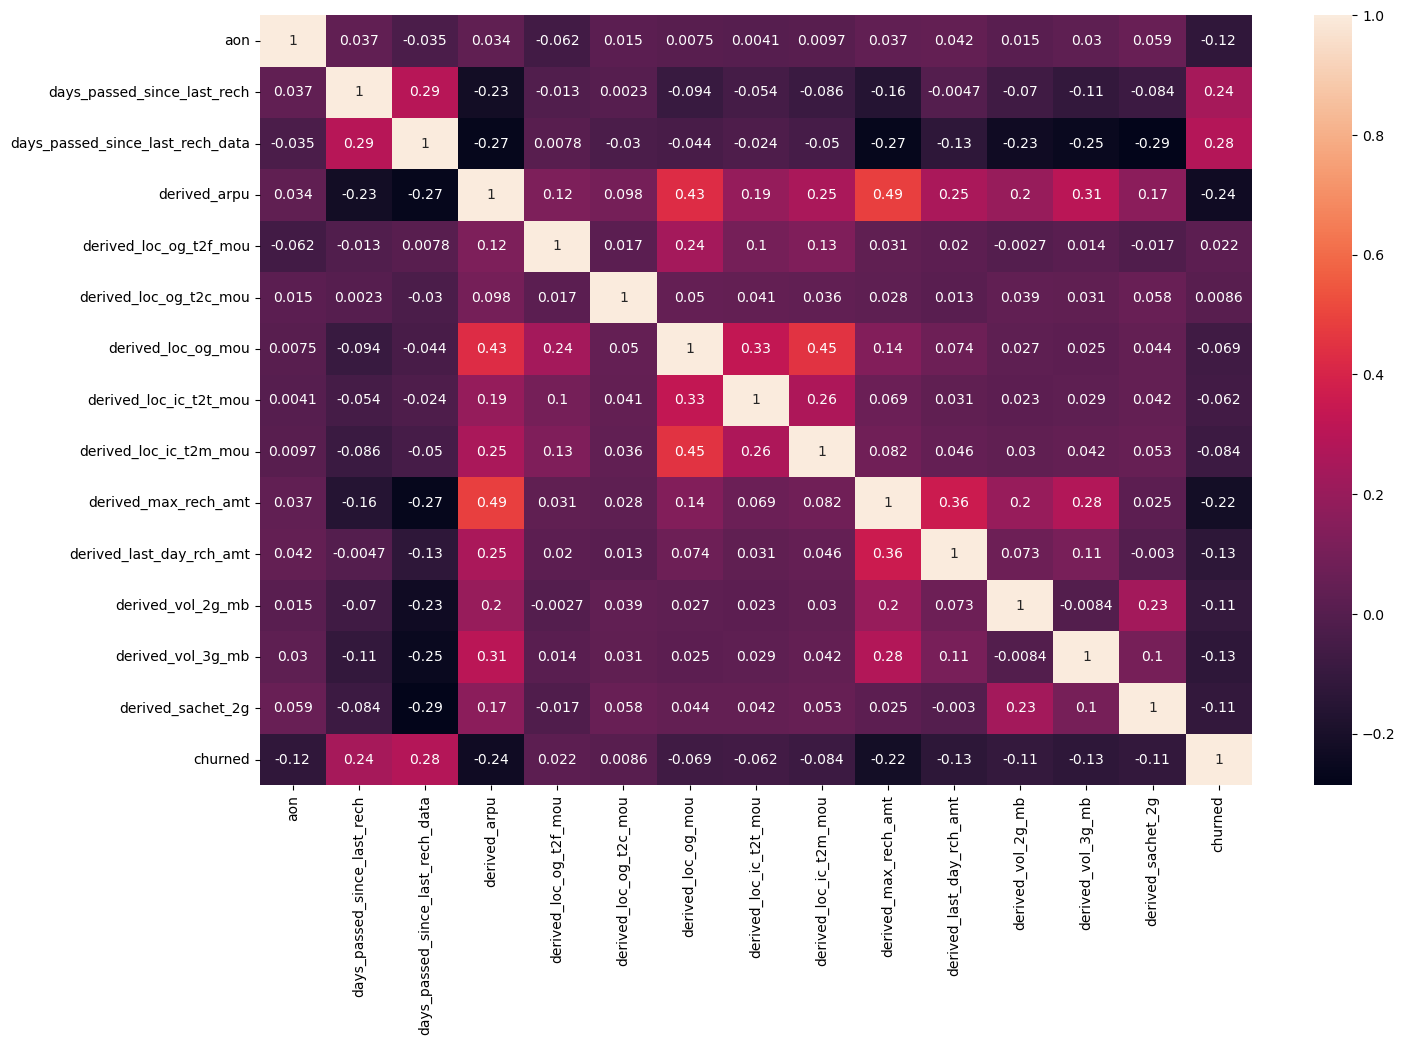

In [137]:
#adding churned column
cols = top_14.append(high_valued_customers_df.columns[-2:-1])
plt.figure(figsize=(16,10))
sns.heatmap(high_valued_customers_df[cols].corr(),annot=True)
plt.show()

As there no significant multicollinearity within our dataset now, we can move further

## Feature Importance

In [139]:
# we are going to use Random Forest for feature importance
rf_best = RandomForestClassifier(random_state=41, n_jobs=-1, max_depth=20, max_features=4, min_samples_leaf=5, n_estimators=100)
X_train_smt_df = pd.DataFrame(data=X_train_smt, columns=X.columns)
rf_best.fit(X_train_smt_df[top_14], y_train_smt)

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=5,
                       n_jobs=-1, random_state=41)

In [141]:
feature_imp_df = pd.DataFrame({
    "Feature Name": X_train_smt_df[top_14].columns,
    "Importance" : rf_best.feature_importances_
})

feature_imp_df.sort_values(by="Importance", ascending=False)

Feature Name  Importance
8             derived_loc_ic_t2m_mou    0.170171
2   days_passed_since_last_rech_data    0.166470
1        days_passed_since_last_rech    0.135456
7             derived_loc_ic_t2t_mou    0.087683
9               derived_max_rech_amt    0.077513
3                       derived_arpu    0.064332
6                 derived_loc_og_mou    0.052975
10          derived_last_day_rch_amt    0.051977
0                                aon    0.047682
11                 derived_vol_2g_mb    0.039012
4             derived_loc_og_t2f_mou    0.038848
13                 derived_sachet_2g    0.025594
12                 derived_vol_3g_mb    0.022609
5             derived_loc_og_t2c_mou    0.019680

In [164]:
print("Top 15 Features are : ",feature_imp_df['Feature Name'].values)

Top 15 Features are :  ['aon' 'days_passed_since_last_rech' 'days_passed_since_last_rech_data'
 'derived_arpu' 'derived_loc_og_t2f_mou' 'derived_loc_og_t2c_mou'
 'derived_loc_og_mou' 'derived_loc_ic_t2t_mou' 'derived_loc_ic_t2m_mou'
 'derived_max_rech_amt' 'derived_last_day_rch_amt' 'derived_vol_2g_mb'
 'derived_vol_3g_mb' 'derived_sachet_2g']


### Analysing 'days_passed_since_last_rech_data','days_passed_since_last_rech' for churned and non churned cases

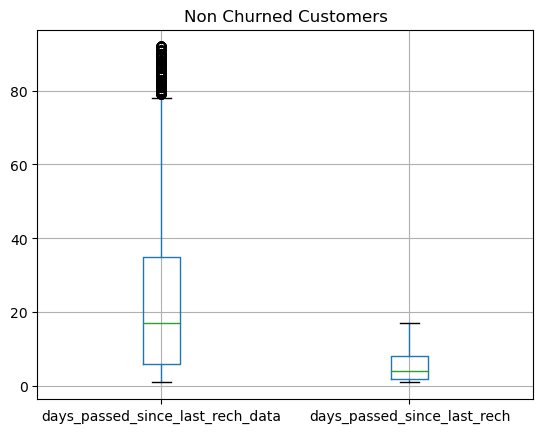

In [144]:
high_valued_customers_df[high_valued_customers_df['churned']==0][['days_passed_since_last_rech_data','days_passed_since_last_rech']].boxplot()
plt.title("Non Churned Customers");

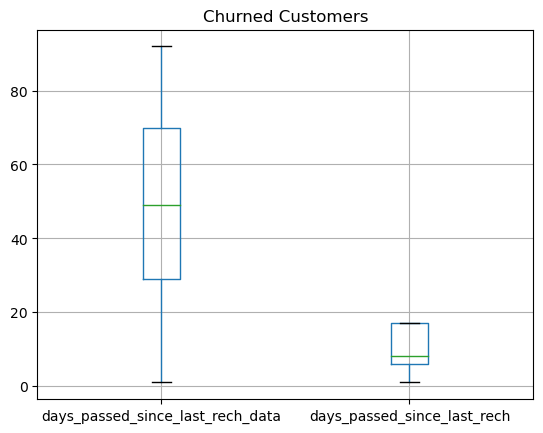

In [168]:
high_valued_customers_df[high_valued_customers_df['churned']==1][['days_passed_since_last_rech_data','days_passed_since_last_rech']].boxplot()
plt.title("Churned Customers");

In [170]:
print("Average of 'days_passed_since_last_rech_data','days_passed_since_last_rech' for non-churned customers")
print(high_valued_customers_df[high_valued_customers_df['churned']==0][['days_passed_since_last_rech_data','days_passed_since_last_rech']].mean())

Average of 'days_passed_since_last_rech_data','days_passed_since_last_rech' for non-churned customers
days_passed_since_last_rech_data    24.643015
days_passed_since_last_rech          5.759647
dtype: float64


In [173]:
print("Average of 'days_passed_since_last_rech_data','days_passed_since_last_rech' for churned customers")
print(high_valued_customers_df[high_valued_customers_df['churned']==1][['days_passed_since_last_rech_data','days_passed_since_last_rech']].mean())

Average of 'days_passed_since_last_rech_data','days_passed_since_last_rech' for churned customers
days_passed_since_last_rech_data    48.728273
days_passed_since_last_rech          9.942428
dtype: float64


### Analysing 'derived_loc_ic_t2t_mou','derived_loc_ic_t2m_mou' for churned and non churned cases

In [149]:
print("Average Derived Minute for usage for non-churned customers")
print(high_valued_customers_df[high_valued_customers_df['churned']==0][['derived_loc_ic_t2t_mou',
                                                                       'derived_loc_ic_t2m_mou']].mean())

Average Derived Minute for usage for non-churned customers
derived_loc_ic_t2t_mou   -0.636034
derived_loc_ic_t2m_mou    0.617683
dtype: float64


In [150]:
print("Average Derived Minute for usage for churned customers")
print(high_valued_customers_df[high_valued_customers_df['churned']==1][['derived_loc_ic_t2t_mou',
                                                                       'derived_loc_ic_t2m_mou']].mean())

Average Derived Minute for usage for churned customers
derived_loc_ic_t2t_mou    -4.453370
derived_loc_ic_t2m_mou   -12.457738
dtype: float64


#### Insights
- Churned customers, on average, experienced a decrease of 12.4 minutes in their usage of incoming calls (derived_loc_ic_t2m_mou) during the action phase. This decline suggests that they are more likely to leave.
- Similarly, the trend applies to "derived_loc_ic_t2t_mou," where churned customers saw a decrease of 4.4 minutes in their incoming call usage during the action phase. This decline further indicates that they are more likely to churn.

### Analysing 'derived_arpu' for churned and non churned cases

In [151]:
print("Average Revenue per user for non-churned customers")
print(high_valued_customers_df[high_valued_customers_df['churned']==0][['derived_arpu']].mean())

Average Revenue per user for non-churned customers
derived_arpu   -5.710071
dtype: float64


In [152]:
print("Average Revenue per user for churned customers")
print(high_valued_customers_df[high_valued_customers_df['churned']==1][['derived_arpu']].mean())

Average Revenue per user for churned customers
derived_arpu   -153.718818
dtype: float64


#### Insights
- The "derived_arpu" is calculated by subtracting the average arpu of the action phase from the arpu of the good phase. The negative value of the derived arpu indicates a greater drop in revenue per user during the action phase.
- When there is a noticeable decline in revenue per user during the action phase, it indicates a higher likelihood of customer churn.

### Analysing 'derived_last_day_rch_amt' for churned and non churned cases

In [153]:
print("Average derived last day recharge for non-churned customers")
print(high_valued_customers_df[high_valued_customers_df['churned']==0][['derived_last_day_rch_amt']].mean())

Average derived last day recharge for non-churned customers
derived_last_day_rch_amt   -2.826905
dtype: float64


In [154]:
print("Average derived last day recharge for churned customers")
print(high_valued_customers_df[high_valued_customers_df['churned']==1][['derived_last_day_rch_amt']].mean())

Average derived last day recharge for churned customers
derived_last_day_rch_amt   -36.214705
dtype: float64


#### Insights
- The "derived_last_day_rch_amt" is calculated by subtracting the last recharge amount of the action phase from the last recharge amount of the good phase. The negative value of the "derived_last_day_rch_amt" indicates a greater drop in recharge during the action phase.
- When there is a noticeable decline last recharge during the action phase, it indicates a higher likelihood of customer churn.

### Analysing 'aon' for churned and non churned cases

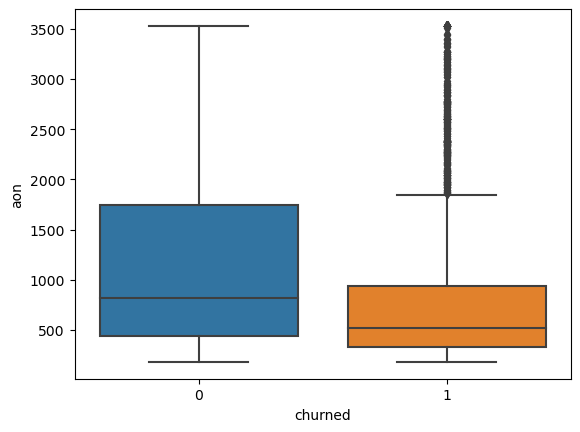

In [160]:
sns.boxplot(x=high_valued_customers_df['churned'],y=high_valued_customers_df['aon']);

In [156]:
print("Average Age of Network (aon) for non-churned customers")
print(high_valued_customers_df[high_valued_customers_df['churned']==0][['aon']].mean())

Average Age of Network (aon) for non-churned customers
aon    1187.02886
dtype: float64


In [158]:
print("Average Age of Network (aon) for churned customers")
print(high_valued_customers_df[high_valued_customers_df['churned']==1][['aon']].mean())

Average Age of Network (aon) for churned customers
aon    785.285845
dtype: float64


#### Insights
- By analysing the Age of Network, new customers are more likely to churn as compare to old customers

### Analysing 'derived_max_rech_amt' for churned and non churned cases

In [161]:
print("Average Max recharge amount for non-churned customers")
print(high_valued_customers_df[high_valued_customers_df['churned']==0][['derived_max_rech_amt']].mean())

Average Max recharge amount for non-churned customers
derived_max_rech_amt    0.691566
dtype: float64


In [163]:
print("Average Max recharge amount for non-churned customers")
print(high_valued_customers_df[high_valued_customers_df['churned']==1][['derived_max_rech_amt']].mean())

Average Max recharge amount for non-churned customers
derived_max_rech_amt   -47.978823
dtype: float64


#### Insights
- A negative value of 47.9 indicates that there is drop in maximum recharge amount, which indicates the likelihood of customer churn

### Analysing 'derived_vol_2g_mb', 'derived_sachet_2g', 'derived_vol_3g_mb' for churned and non churned cases

In [166]:
print("Average 'derived_vol_2g_mb', 'derived_sachet_2g', 'derived_vol_3g_mb'  for non-churned customers")
print(high_valued_customers_df[high_valued_customers_df['churned']==0][['derived_vol_2g_mb', 'derived_sachet_2g', 'derived_vol_3g_mb']].mean())

Average 'derived_vol_2g_mb', 'derived_sachet_2g', 'derived_vol_3g_mb'  for non-churned customers
derived_vol_2g_mb   -20.030991
derived_sachet_2g    -0.147834
derived_vol_3g_mb   -16.914938
dtype: float64


In [167]:
print("Average 'derived_vol_2g_mb', 'derived_sachet_2g', 'derived_vol_3g_mb'  for non-churned customers")
print(high_valued_customers_df[high_valued_customers_df['churned']==1][['derived_vol_2g_mb', 'derived_sachet_2g', 'derived_vol_3g_mb']].mean())

Average 'derived_vol_2g_mb', 'derived_sachet_2g', 'derived_vol_3g_mb'  for non-churned customers
derived_vol_2g_mb   -53.218960
derived_sachet_2g    -0.396498
derived_vol_3g_mb   -87.112967
dtype: float64


#### Insights
- A negative value of derived_vol_3g_mb indicates that there is drop data volume consumption by user, which indicates the likelihood of customer churn
- "derived_sachet_2g" is not a strong indicator of churn

 # 4. Business Recommendation for Minimising Churn

## Feature Related Recommendations:

- Customers with an AON (Age of Network) less than 785 are more likely to churn compared to others. Customers who have been using the telecom operator for more than 1200 days can be considered loyal.

- Customers exhibiting significantly negative values in "derived_loc_ic_t2m_mou" are likely to churn. A decrease in incoming call usage often indicates customer churn. To address this, **the company should reconsider its plans and provide customers with appropriate options, especially if incoming calls are charged. It's possible that the reduction in incoming calls is due to poor network coverage in the customers' current location.**

- Customers who have a value of "days_passed_since_last_rech_data" equal to or greater than 47 are at a higher risk of churning. To mitigate this churn, the sales team should prioritize customers who have not made a recharge for mobile data in the last 1 and a half months or so. **Offering them special recharge offers can help reduce the likelihood of churn.**

- Customers who have a value of "days_passed_since_last_rech" equal to or greater than 17 are at a higher risk of churning. **The sales team should prioritize these customers who have not made a recharge in the last 17 days or more and offer them special talk time deals to minimize churn.**

- Customers who exhibit significantly negative values in "derived_last_day_rch_amt" are likely to churn. The sales team should prioritize customers whose derived_last_day_rch_amt is greater than or equal to 36. A positive in the last recharge amount during the action phase serves as an indicator of potential churn.

- When customers who have stopped using the service (churned customers) have high negative values in "derived_vol_3g_mb," it means that there has been a significant decrease in their 3G data usage during the action phase. **To keep these customers who use 3G data, the telecom company may need to make changes to their 3G data plans.**

- Customers with negative values in "derived_arpu" are more likely to churn. The sales team should prioritize customers whose derived_arpu is less than -153. A decrease in the average revenue per user during the action phase is a significant indicator of potential customer churn. **Revenue is generated through customer recharges, so it is important to assess other information such as a drop in outgoing calls or data recharges. By considering these factors, suitable offers can be provided to customers in an effort to reduce churn.**

# 5. Conclusion

## Predictor model

Because it costs less to keep existing customers happy with good offers than it does to find new customers, a sensitivity score is used to help create the final predictor model. This score helps determine how likely customers are to leave, so the company can focus on keeping them satisfied and prevent them from switching to another company.

Logistic Regression trained with 19 principal components has accuracy score of 0.72 and sensitivity score of 0.839 for Probability Cutoff = 0.4

- The final model could predict 83.9% of the churned customers correctly out of all the churned customers. (sensitivity)
- Accuracy score 0.72 means 72% of the predictions made by the final model are correct out of all the predictions.

## Interpretable model

The top 14 features selected by RFE and manual inspection of VIF and p-values are:

- derived_arpu
- derived_loc_og_mou
- derived_max_rech_amt
- days_passed_since_last_rech_data
- derived_loc_ic_t2m_mou
- derived_vol_3g_mb
- derived_last_day_rch_amt
- derived_sachet_2g
- derived_loc_ic_t2t_mou
- derived_vol_2g_mb
- days_passed_since_last_rech
- derived_loc_og_t2f_mou
- derived_loc_og_t2c_mou
- aon

Logistic Regression model is built with the above features.